In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

# Set style for better visualizations
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

In [2]:
def read():
        file_id = "1c222AbSUMn9vKcepLZDnyCKUN2B8BQtP"
        url = f"https://drive.google.com/uc?export=download&id={file_id}"
        df = pd.read_csv(url, sep=',', low_memory=False)
        return df

In [8]:
df= read()
df['datetime'] = pd.to_datetime(df['datetime'])
df.set_index('datetime', inplace=True)
print("Dataset Overview:")
print(f"Shape: {df.shape}")
print(f"Date range: {df.index.min()} to {df.index.max()}")
print(f"Total days: {len(df)} days")
print("\nFirst 5 rows:")
print(df.head())

print("\nDataset Info:")
print(df.info())

print("\nMissing Values:")
print(df.isnull().sum())

print("\nBasic Statistics:")
print(df.describe())

Dataset Overview:
Shape: (1441, 10)
Date range: 2006-12-17 00:00:00 to 2010-11-26 00:00:00
Total days: 1441 days

First 5 rows:
            Global_active_power  Global_reactive_power  Voltage  \
datetime                                                          
2006-12-17                1.044                  0.152   242.73   
2006-12-18                0.278                  0.126   246.17   
2006-12-19                0.414                  0.242   241.19   
2006-12-20                0.824                  0.058   245.57   
2006-12-21                1.814                  0.148   243.51   

            Global_intensity  Sub_metering_1  Sub_metering_2  Sub_metering_3  \
datetime                                                                       
2006-12-17               4.4             0.0             2.0             0.0   
2006-12-18               1.2             0.0             2.0             0.0   
2006-12-19               2.0             0.0             1.0             0.0   
20


1. TIME SERIES VISUALIZATION


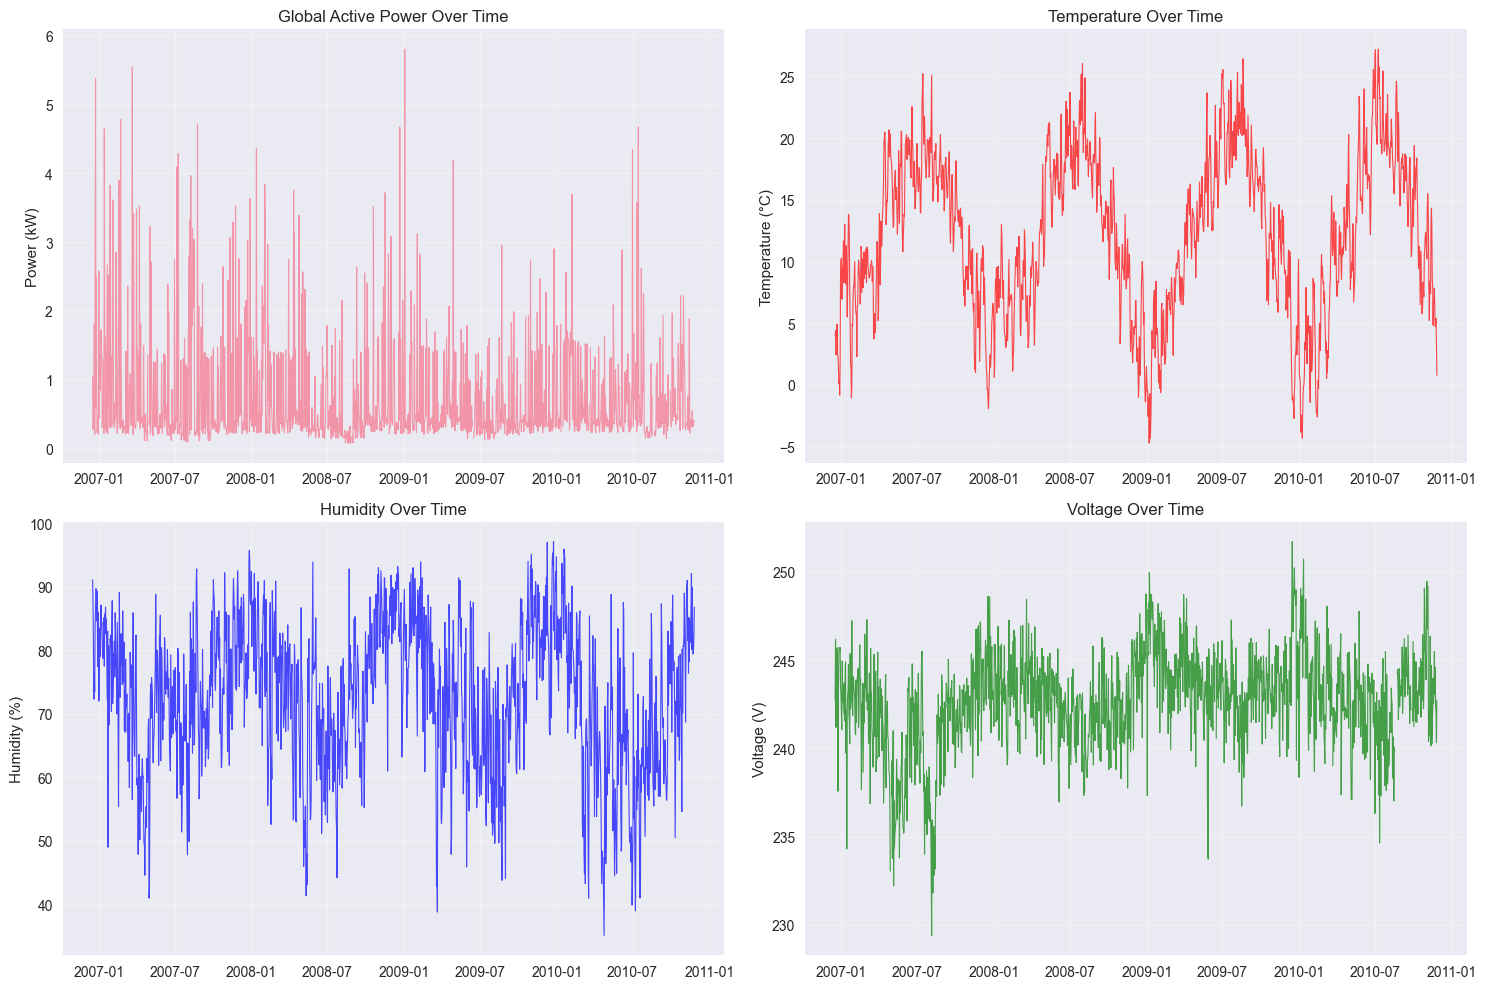

In [9]:
# 1. TIME SERIES VISUALIZATION
print("\n" + "="*50)
print("1. TIME SERIES VISUALIZATION")
print("="*50)

# Main power consumption over time
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Global Active Power
axes[0,0].plot(df.index, df['Global_active_power'], alpha=0.7, linewidth=0.8)
axes[0,0].set_title('Global Active Power Over Time')
axes[0,0].set_ylabel('Power (kW)')
axes[0,0].grid(True, alpha=0.3)

# Temperature
axes[0,1].plot(df.index, df['temp'], color='red', alpha=0.7, linewidth=0.8)
axes[0,1].set_title('Temperature Over Time')
axes[0,1].set_ylabel('Temperature (°C)')
axes[0,1].grid(True, alpha=0.3)

# Humidity
axes[1,0].plot(df.index, df['humidity'], color='blue', alpha=0.7, linewidth=0.8)
axes[1,0].set_title('Humidity Over Time')
axes[1,0].set_ylabel('Humidity (%)')
axes[1,0].grid(True, alpha=0.3)

# Voltage
axes[1,1].plot(df.index, df['Voltage'], color='green', alpha=0.7, linewidth=0.8)
axes[1,1].set_title('Voltage Over Time')
axes[1,1].set_ylabel('Voltage (V)')
axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()



2. SEASONAL PATTERNS ANALYSIS


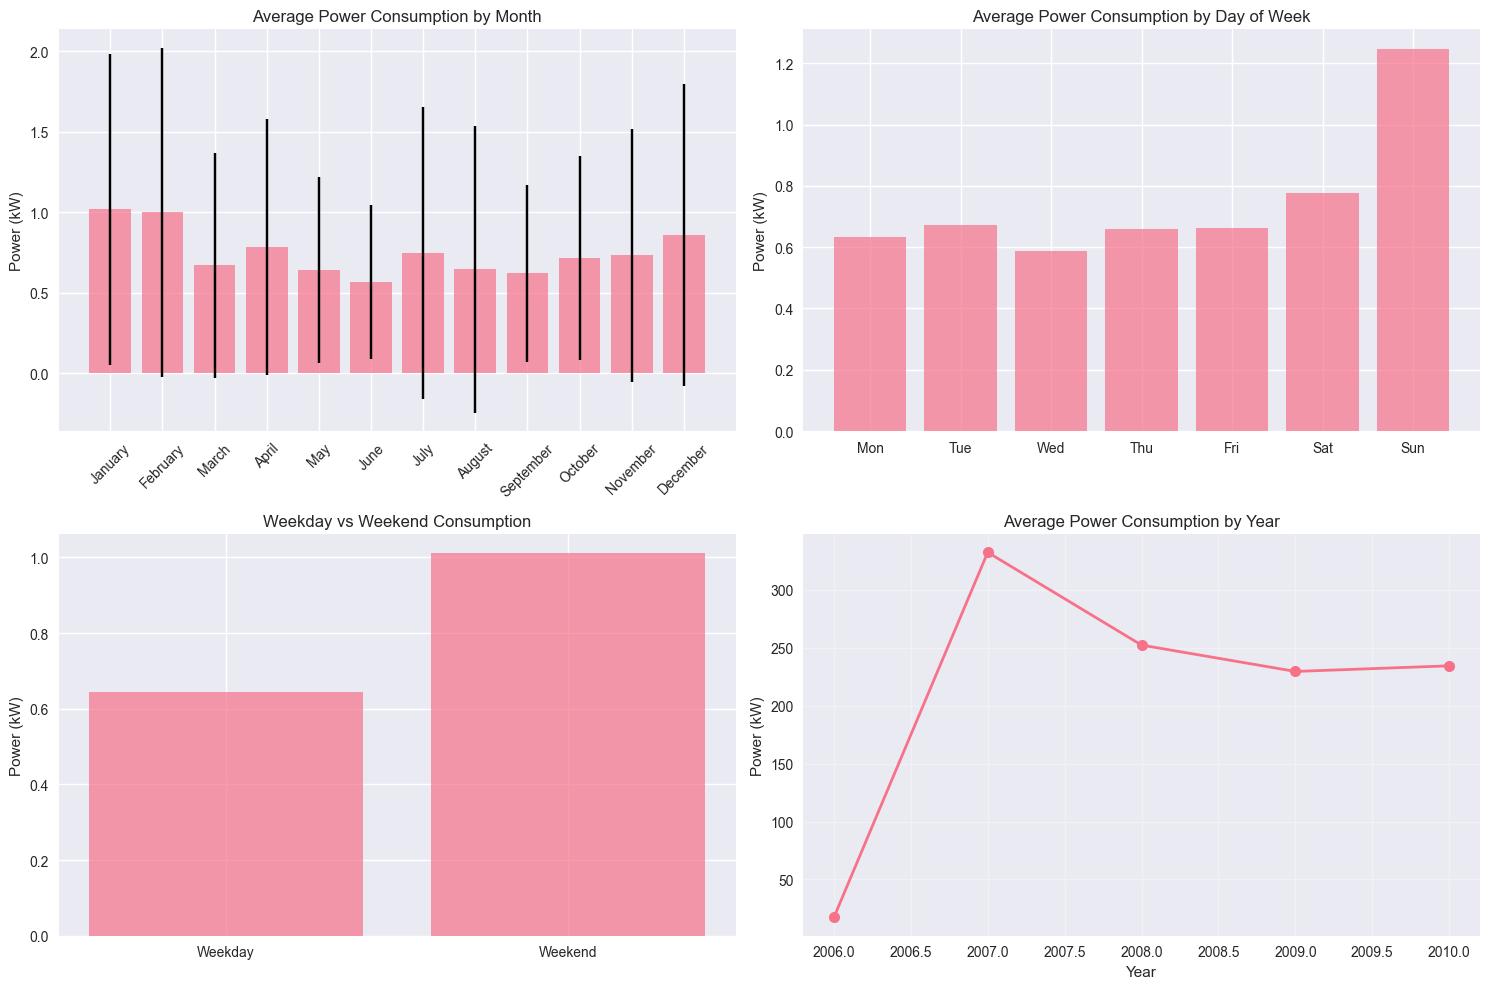

In [13]:

# 2. SEASONAL PATTERNS ANALYSIS
print("\n" + "="*50)
print("2. SEASONAL PATTERNS ANALYSIS")
print("="*50)

# Add time-based features
df['year'] = df.index.year
df['month'] = df.index.month
df['day_of_week'] = df.index.dayofweek
df['day_of_year'] = df.index.dayofyear
df['is_weekend'] = (df['day_of_week'] >= 5).astype(int)

# Monthly patterns
monthly_avg = df.groupby('month')['Global_active_power'].agg(['mean', 'std']).reset_index()
monthly_avg['month_name'] = pd.to_datetime(monthly_avg['month'], format='%m').dt.month_name()

fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Monthly average consumption
axes[0,0].bar(monthly_avg['month_name'], monthly_avg['mean'], 
              yerr=monthly_avg['std'], capsize=5, alpha=0.7)
axes[0,0].set_title('Average Power Consumption by Month')
axes[0,0].set_ylabel('Power (kW)')
axes[0,0].tick_params(axis='x', rotation=45)

# Day of week patterns
dow_avg = df.groupby('day_of_week')['Global_active_power'].mean()
dow_names = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
axes[0,1].bar(dow_names, dow_avg.values, alpha=0.7)
axes[0,1].set_title('Average Power Consumption by Day of Week')
axes[0,1].set_ylabel('Power (kW)')

# Weekend vs Weekday
weekend_comparison = df.groupby('is_weekend')['Global_active_power'].mean()
axes[1,0].bar(['Weekday', 'Weekend'], weekend_comparison.values, alpha=0.7)
axes[1,0].set_title('Weekday vs Weekend Consumption')
axes[1,0].set_ylabel('Power (kW)')

# Yearly trends
yearly_avg = df.groupby('year')['Global_active_power'].sum()
axes[1,1].plot(yearly_avg.index, yearly_avg.values, marker='o', linewidth=2, markersize=8)
axes[1,1].set_title('Average Power Consumption by Year')
axes[1,1].set_ylabel('Power (kW)')
axes[1,1].set_xlabel('Year')
axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()




3. CORRELATION ANALYSIS


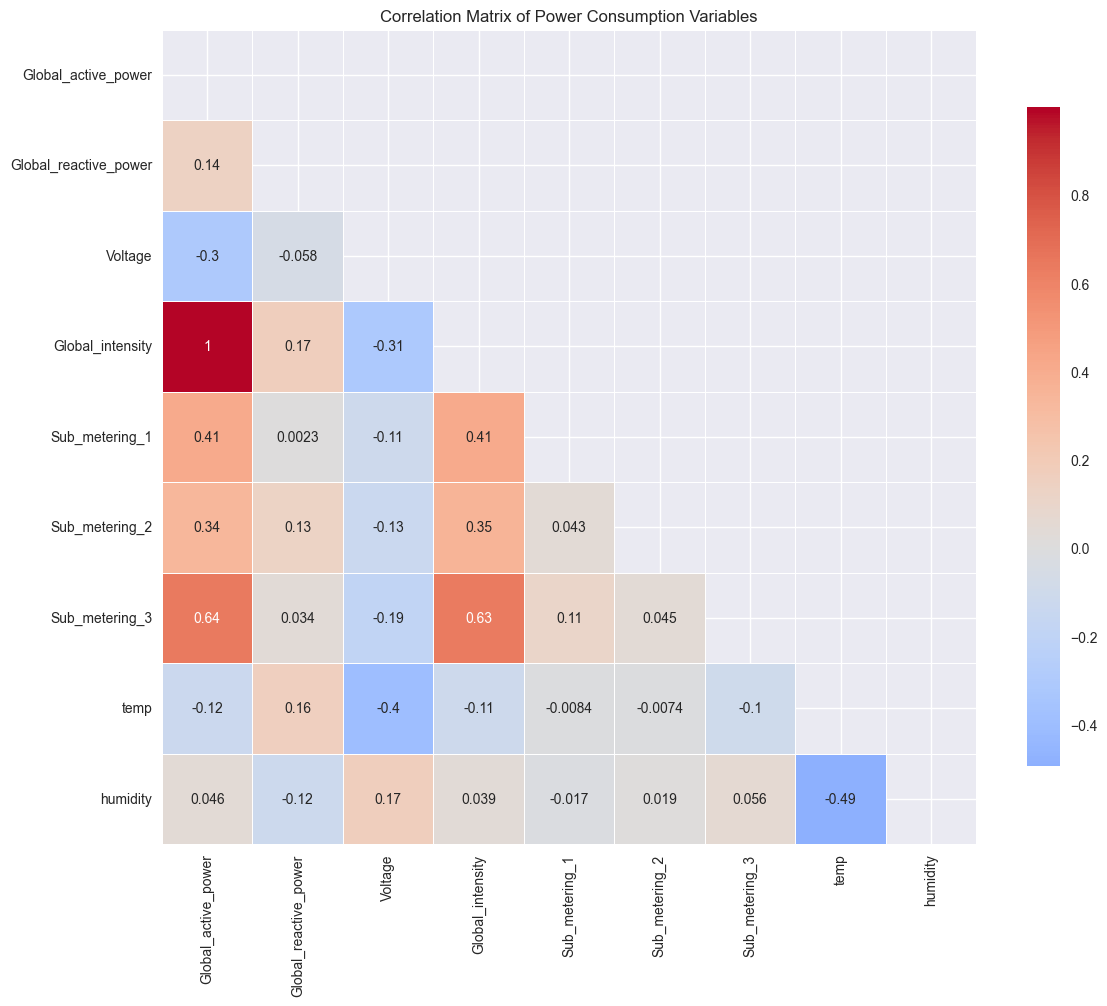

Key Correlations with Global Active Power:
Global_intensity: 0.999
Sub_metering_3: 0.642
Sub_metering_1: 0.411
Sub_metering_2: 0.343
Global_reactive_power: 0.142
humidity: 0.046
temp: -0.123
Voltage: -0.304


In [14]:
# 3. CORRELATION ANALYSIS
print("\n" + "="*50)
print("3. CORRELATION ANALYSIS")
print("="*50)

# Select numeric columns for correlation
numeric_cols = ['Global_active_power', 'Global_reactive_power', 'Voltage', 
                'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 
                'Sub_metering_3', 'temp', 'humidity']

correlation_matrix = df[numeric_cols].corr()

plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', 
            center=0, square=True, linewidths=0.5, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix of Power Consumption Variables')
plt.tight_layout()
plt.show()

print("Key Correlations with Global Active Power:")
correlations = correlation_matrix['Global_active_power'].sort_values(ascending=False)
for var, corr in correlations.items():
    if var != 'Global_active_power':
        print(f"{var}: {corr:.3f}")




4. WEATHER IMPACT ANALYSIS


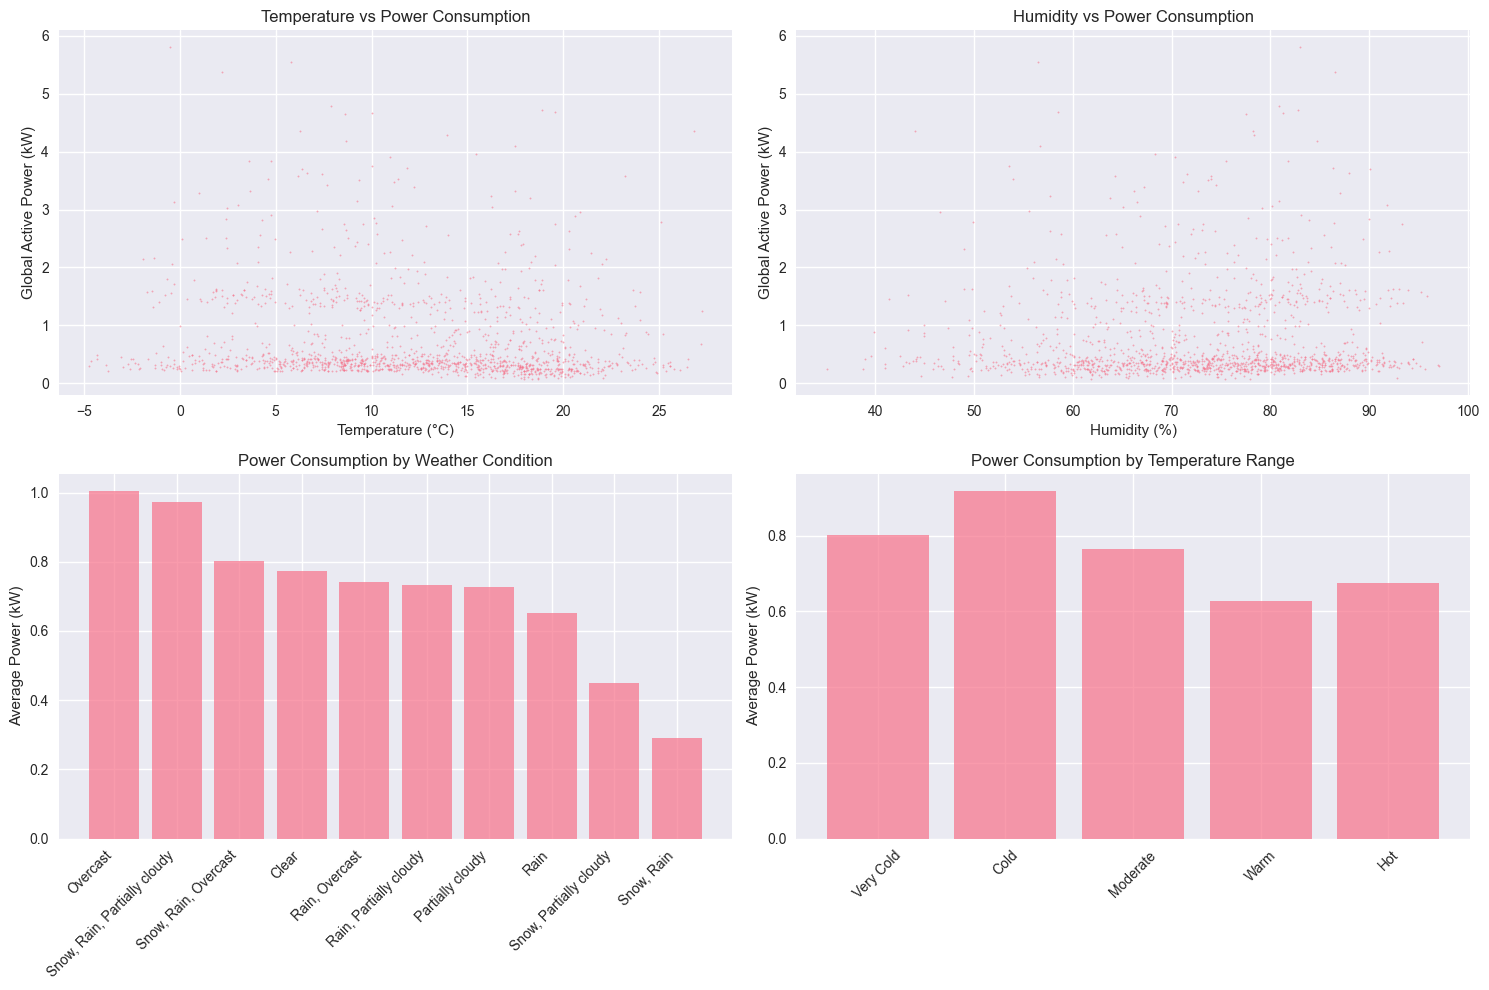

In [15]:
# 4. WEATHER IMPACT ANALYSIS
print("\n" + "="*50)
print("4. WEATHER IMPACT ANALYSIS")
print("="*50)

fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Temperature vs Power consumption
axes[0,0].scatter(df['temp'], df['Global_active_power'], alpha=0.5, s=1)
axes[0,0].set_xlabel('Temperature (°C)')
axes[0,0].set_ylabel('Global Active Power (kW)')
axes[0,0].set_title('Temperature vs Power Consumption')

# Add trend line
z = np.polyfit(df['temp'], df['Global_active_power'], 1)
p = np.poly1d(z)
axes[0,0].plot(df['temp'], p(df['temp']), "r--", alpha=0.8)

# Humidity vs Power consumption
axes[0,1].scatter(df['humidity'], df['Global_active_power'], alpha=0.5, s=1)
axes[0,1].set_xlabel('Humidity (%)')
axes[0,1].set_ylabel('Global Active Power (kW)')
axes[0,1].set_title('Humidity vs Power Consumption')

# Weather conditions
weather_avg = df.groupby('conditions')['Global_active_power'].mean().sort_values(ascending=False)
axes[1,0].bar(range(len(weather_avg)), weather_avg.values, alpha=0.7)
axes[1,0].set_xticks(range(len(weather_avg)))
axes[1,0].set_xticklabels(weather_avg.index, rotation=45, ha='right')
axes[1,0].set_ylabel('Average Power (kW)')
axes[1,0].set_title('Power Consumption by Weather Condition')

# Temperature bins analysis
df['temp_bin'] = pd.cut(df['temp'], bins=5, labels=['Very Cold', 'Cold', 'Moderate', 'Warm', 'Hot'])
temp_bin_avg = df.groupby('temp_bin')['Global_active_power'].mean()
axes[1,1].bar(temp_bin_avg.index, temp_bin_avg.values, alpha=0.7)
axes[1,1].set_ylabel('Average Power (kW)')
axes[1,1].set_title('Power Consumption by Temperature Range')
axes[1,1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()




5. SUB-METERING ANALYSIS


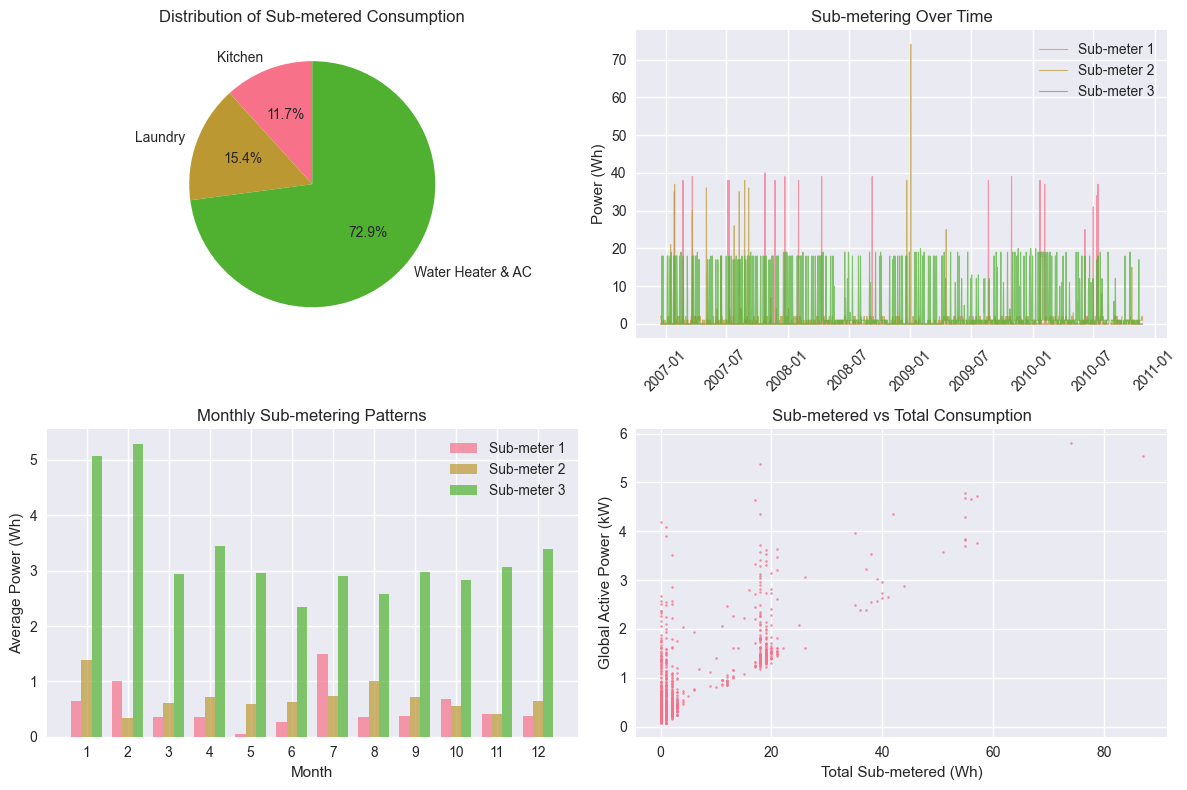

In [19]:
# 5. SUB-METERING ANALYSIS
print("\n" + "="*50)
print("5. SUB-METERING ANALYSIS")
print("="*50)

# Sub-metering breakdown
sub_cols = ['Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']
sub_totals = df[sub_cols].sum()

plt.figure(figsize=(12, 8))

# Pie chart of sub-metering distribution
plt.subplot(2, 2, 1)
plt.pie(sub_totals.values, labels=['Kitchen', 'Laundry', 'Water Heater & AC'], 
        autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Sub-metered Consumption')

# Time series of sub-metering
plt.subplot(2, 2, 2)
for i, col in enumerate(sub_cols):
    plt.plot(df.index, df[col], alpha=0.7, label=f'Sub-meter {i+1}', linewidth=0.8)
plt.title('Sub-metering Over Time')
plt.ylabel('Power (Wh)')
plt.legend()
plt.xticks(rotation=45)

# Monthly sub-metering patterns
plt.subplot(2, 2, 3)
monthly_sub = df.groupby('month')[sub_cols].mean()
x = range(1, 13)
width = 0.25
for i, col in enumerate(sub_cols):
    plt.bar([xi + i*width for xi in x], monthly_sub[col], 
            width, label=f'Sub-meter {i+1}', alpha=0.7)
plt.xlabel('Month')
plt.ylabel('Average Power (Wh)')
plt.title('Monthly Sub-metering Patterns')
plt.legend()
plt.xticks([xi + width for xi in x], range(1, 13))

# Sub-metering vs total consumption
plt.subplot(2, 2, 4)
df['total_sub'] = df[sub_cols].sum(axis=1)
plt.scatter(df['total_sub'], df['Global_active_power'], alpha=0.8, s=2)
plt.xlabel('Total Sub-metered (Wh)')
plt.ylabel('Global Active Power (kW)')
plt.title('Sub-metered vs Total Consumption')

# Add trend line
z = np.polyfit(df['total_sub'], df['Global_active_power'], 1)
p = np.poly1d(z)
plt.plot(df['total_sub'], p(df['total_sub']), "r--", alpha=0.8)

plt.tight_layout()
plt.show()



In [20]:
# 6. STATISTICAL ANALYSIS
print("\n" + "="*50)
print("6. STATISTICAL ANALYSIS")
print("="*50)

from scipy import stats

# Normality tests
print("Normality Tests (Shapiro-Wilk p-values):")
sample_size = min(5000, len(df))  # Shapiro-Wilk works best with smaller samples
sample_df = df.sample(n=sample_size, random_state=42)

for col in numeric_cols:
    statistic, p_value = stats.shapiro(sample_df[col])
    print(f"{col}: {p_value:.6f} {'(Normal)' if p_value > 0.05 else '(Not Normal)'}")

# Stationarity test (Augmented Dickey-Fuller)
from statsmodels.tsa.stattools import adfuller

print(f"\nStationarity Test (ADF) for Global Active Power:")
result = adfuller(df['Global_active_power'].dropna())
print(f"ADF Statistic: {result[0]:.6f}")
print(f"p-value: {result[1]:.6f}")
print(f"Critical Values:")
for key, value in result[4].items():
    print(f"\t{key}: {value:.3f}")

if result[1] <= 0.05:
    print("Result: Series is stationary (reject H0)")
else:
    print("Result: Series is non-stationary (fail to reject H0)")




6. STATISTICAL ANALYSIS
Normality Tests (Shapiro-Wilk p-values):
Global_active_power: 1.000000 (Normal)
Global_reactive_power: 1.000000 (Normal)
Voltage: 1.000000 (Normal)
Global_intensity: 1.000000 (Normal)
Sub_metering_1: 1.000000 (Normal)
Sub_metering_2: 1.000000 (Normal)
Sub_metering_3: 1.000000 (Normal)
temp: 0.000000 (Not Normal)
humidity: 0.000000 (Not Normal)

Stationarity Test (ADF) for Global Active Power:
ADF Statistic: -5.945747
p-value: 0.000000
Critical Values:
	1%: -3.435
	5%: -2.864
	10%: -2.568
Result: Series is stationary (reject H0)



7. OUTLIER DETECTION


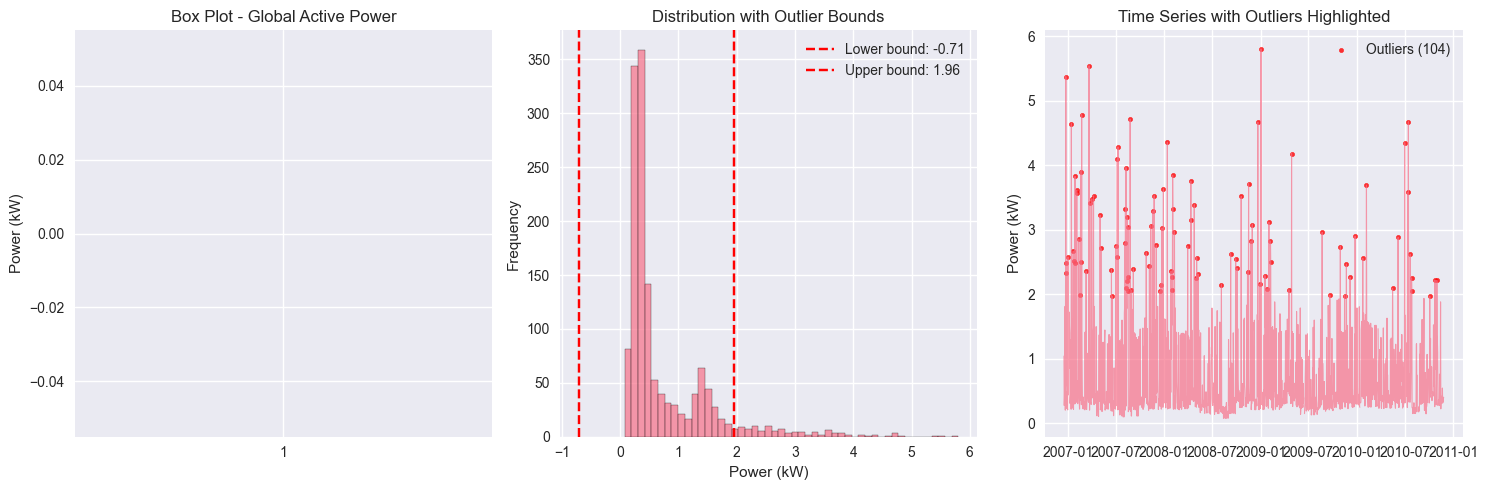

Number of outliers detected: 104 (7.22%)
Outlier bounds: [-0.710, 1.956]

8. KEY INSIGHTS FROM EDA
📊 DATASET SUMMARY:
   • Time period: 2006-12-17 to 2010-11-26
   • Total observations: 1,441 days
   • Missing values: 105 total

⚡ POWER CONSUMPTION PATTERNS:
   • Average daily consumption: 0.748 kW
   • Peak consumption: 5.806 kW
   • Minimum consumption: 0.080 kW
   • Standard deviation: 0.795 kW

📅 TEMPORAL PATTERNS:
   • Highest consumption month: January
   • Lowest consumption month: June
   • Weekend vs Weekday difference: 0.368 kW

🌡️ WEATHER CORRELATIONS:
   • Temperature correlation: -0.123
   • Humidity correlation: 0.046

🔍 DATA QUALITY:
   • Outliers detected: 104 (7.2%)
   • Series stationarity: Stationary

📈 NEXT STEPS FOR MODELING:
   • Feature engineering: Create lag features, rolling averages, seasonal decomposition
   • Handle outliers: Consider removal or transformation
   • Stationarity: Apply differencing if needed for ARIMA models
   • External variables: Include 

In [ ]:
# 7. OUTLIER DETECTION
print("\n" + "="*50)
print("7. OUTLIER DETECTION")
print("="*50)

def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

outliers, lower, upper = detect_outliers_iqr(df, 'Global_active_power')

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.boxplot(df['Global_active_power'])
plt.title('Box Plot - Global Active Power')
plt.ylabel('Power (kW)')

plt.subplot(1, 3, 2)
plt.hist(df['Global_active_power'], bins=50, alpha=0.7, edgecolor='black')
plt.axvline(lower, color='red', linestyle='--', label=f'Lower bound: {lower:.2f}')
plt.axvline(upper, color='red', linestyle='--', label=f'Upper bound: {upper:.2f}')
plt.title('Distribution with Outlier Bounds')
plt.xlabel('Power (kW)')
plt.ylabel('Frequency')
plt.legend()

plt.subplot(1, 3, 3)
plt.plot(df.index, df['Global_active_power'], alpha=0.7, linewidth=0.8)
plt.scatter(outliers.index, outliers['Global_active_power'], 
           color='red', s=10, alpha=0.8, label=f'Outliers ({len(outliers)})')
plt.title('Time Series with Outliers Highlighted')
plt.ylabel('Power (kW)')
plt.legend()

plt.tight_layout()
plt.show()

print(f"Number of outliers detected: {len(outliers)} ({len(outliers)/len(df)*100:.2f}%)")
print(f"Outlier bounds: [{lower:.3f}, {upper:.3f}]")

# 8. SUMMARY INSIGHTS
print("\n" + "="*50)
print("8. KEY INSIGHTS FROM EDA")
print("="*50)

print("📊 DATASET SUMMARY:")
print(f"   • Time period: {df.index.min().strftime('%Y-%m-%d')} to {df.index.max().strftime('%Y-%m-%d')}")
print(f"   • Total observations: {len(df):,} days")
print(f"   • Missing values: {df.isnull().sum().sum()} total")

print(f"\n⚡ POWER CONSUMPTION PATTERNS:")
print(f"   • Average daily consumption: {df['Global_active_power'].mean():.3f} kW")
print(f"   • Peak consumption: {df['Global_active_power'].max():.3f} kW")
print(f"   • Minimum consumption: {df['Global_active_power'].min():.3f} kW")
print(f"   • Standard deviation: {df['Global_active_power'].std():.3f} kW")

print(f"\n📅 TEMPORAL PATTERNS:")
highest_month = monthly_avg.loc[monthly_avg['mean'].idxmax(), 'month_name']
lowest_month = monthly_avg.loc[monthly_avg['mean'].idxmin(), 'month_name']
print(f"   • Highest consumption month: {highest_month}")
print(f"   • Lowest consumption month: {lowest_month}")
print(f"   • Weekend vs Weekday difference: {(weekend_comparison[1] - weekend_comparison[0]):.3f} kW")

print(f"\n🌡️ WEATHER CORRELATIONS:")
temp_corr = correlation_matrix.loc['Global_active_power', 'temp']
humidity_corr = correlation_matrix.loc['Global_active_power', 'humidity']
print(f"   • Temperature correlation: {temp_corr:.3f}")
print(f"   • Humidity correlation: {humidity_corr:.3f}")

print(f"\n🔍 DATA QUALITY:")
print(f"   • Outliers detected: {len(outliers)} ({len(outliers)/len(df)*100:.1f}%)")
print(f"   • Series stationarity: {'Stationary' if result[1] <= 0.05 else 'Non-stationary'}")

print(f"\n📈 NEXT STEPS FOR MODELING:")
print("   • Feature engineering: Create lag features, rolling averages, seasonal decomposition")
print("   • Handle outliers: Consider removal or transformation")
print("   • Stationarity: Apply differencing if needed for ARIMA models")
print("   • External variables: Include temperature and humidity in SARIMAX models")
print("   • Validation strategy: Use time-based splits for model evaluation")

print("\n" + "="*70)
print("EDA COMPLETED - Ready for Feature Engineering and Modeling!")
print("="*70)

In [22]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Prophet
from prophet import Prophet

# Machine Learning
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor

# Deep Learning
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, GRU
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Hyperparameter optimization
import optuna

import warnings
warnings.filterwarnings('ignore')

In [23]:
# ============================================================================
# 1. ADVANCED FEATURE ENGINEERING
# ============================================================================

print("\n" + "="*60)
print("1. ADVANCED FEATURE ENGINEERING")
print("="*60)

def create_time_features(df):
    """Create comprehensive time-based features"""
    df_features = df.copy()
    
    # Basic time features
    df_features['week_of_year'] = df_features.index.isocalendar().week
    df_features['quarter'] = df_features.index.quarter
    
    # Cyclical features (important for capturing seasonality)
    df_features['month_sin'] = np.sin(2 * np.pi * df_features['month'] / 12)
    df_features['month_cos'] = np.cos(2 * np.pi * df_features['month'] / 12)
    df_features['day_sin'] = np.sin(2 * np.pi * df_features['day_of_week'] / 7)
    df_features['day_cos'] = np.cos(2 * np.pi * df_features['day_of_week'] / 7)
    df_features['day_year_sin'] = np.sin(2 * np.pi * df_features['day_of_year'] / 365)
    df_features['day_year_cos'] = np.cos(2 * np.pi * df_features['day_of_year'] / 365)
    
    # Binary features
    df_features['is_winter'] = df_features['month'].isin([12, 1, 2]).astype(int)
    df_features['is_summer'] = df_features['month'].isin([6, 7, 8]).astype(int)
    df_features['is_spring'] = df_features['month'].isin([3, 4, 5]).astype(int)
    df_features['is_autumn'] = df_features['month'].isin([9, 10, 11]).astype(int)
    
    return df_features

def create_lag_features(df, target_col, lags=[1, 2, 3, 7, 14, 30]):
    """Create lag features for the target variable"""
    df_lag = df.copy()
    
    for lag in lags:
        df_lag[f'{target_col}_lag_{lag}'] = df_lag[target_col].shift(lag)
    
    return df_lag

def create_rolling_features(df, target_col, windows=[3, 7, 14, 30]):
    """Create rolling window features"""
    df_rolling = df.copy()
    
    for window in windows:
        # Rolling statistics
        df_rolling[f'{target_col}_rolling_mean_{window}'] = df_rolling[target_col].rolling(window=window).mean()
        df_rolling[f'{target_col}_rolling_std_{window}'] = df_rolling[target_col].rolling(window=window).std()
        df_rolling[f'{target_col}_rolling_min_{window}'] = df_rolling[target_col].rolling(window=window).min()
        df_rolling[f'{target_col}_rolling_max_{window}'] = df_rolling[target_col].rolling(window=window).max()
        
        # Rolling differences
        df_rolling[f'{target_col}_rolling_diff_{window}'] = (
            df_rolling[target_col] - df_rolling[f'{target_col}_rolling_mean_{window}']
        )
    
    return df_rolling

def create_difference_features(df, target_col):
    """Create differencing features for stationarity"""
    df_diff = df.copy()
    
    # First difference
    df_diff[f'{target_col}_diff_1'] = df_diff[target_col].diff(1)
    
    # Seasonal differences
    df_diff[f'{target_col}_diff_7'] = df_diff[target_col].diff(7)  # Weekly
    df_diff[f'{target_col}_diff_30'] = df_diff[target_col].diff(30)  # Monthly
    df_diff[f'{target_col}_diff_365'] = df_diff[target_col].diff(365)  # Yearly
    
    # Percentage changes
    df_diff[f'{target_col}_pct_change_1'] = df_diff[target_col].pct_change(1)
    df_diff[f'{target_col}_pct_change_7'] = df_diff[target_col].pct_change(7)
    
    return df_diff

# Apply feature engineering
print("Creating time-based features...")
df_features = create_time_features(df)

print("Creating lag features...")
df_features = create_lag_features(df_features, 'Global_active_power', lags=[1, 2, 3, 7, 14, 30])

print("Creating rolling window features...")
df_features = create_rolling_features(df_features, 'Global_active_power', windows=[3, 7, 14, 30])

print("Creating difference features...")
df_features = create_difference_features(df_features, 'Global_active_power')

# Weather interaction features
df_features['temp_humidity_interaction'] = df_features['temp'] * df_features['humidity']
df_features['temp_squared'] = df_features['temp'] ** 2
df_features['humidity_squared'] = df_features['humidity'] ** 2

print(f"Feature engineering completed!")
print(f"Original features: {df.shape[1]}")
print(f"Total features after engineering: {df_features.shape[1]}")

# Display new features
new_features = [col for col in df_features.columns if col not in df.columns]
print(f"New features created: {len(new_features)}")
print("Sample of new features:", new_features[:10])




1. ADVANCED FEATURE ENGINEERING
Creating time-based features...
Creating lag features...
Creating rolling window features...
Creating difference features...
Feature engineering completed!
Original features: 17
Total features after engineering: 64
New features created: 47
Sample of new features: ['week_of_year', 'quarter', 'month_sin', 'month_cos', 'day_sin', 'day_cos', 'day_year_sin', 'day_year_cos', 'is_winter', 'is_summer']


In [256]:
# ============================================================================
# 2. DATA PREPARATION FOR MODELING
# ============================================================================

print("\n" + "="*60)
print("2. DATA PREPARATION FOR MODELING")
print("="*60)

# Remove rows with NaN values (due to lag and rolling features)
df_clean = df_features.dropna()
print(f"Data after removing NaN: {df_clean.shape[0]} rows")

#print(df_clean.head())
# Define target and feature columns
target_col = 'Global_active_power'  # Target variable
exclude_cols = [target_col, 'conditions']  # Exclude target and categorical variables
#feature_cols = [col for col in df_clean.columns if col not in exclude_cols]
feature_cols=['temp','humidity','Sub_metering_3','Sub_metering_1','Sub_metering_2']

print(f"Target variable: {target_col}")
print(f"Number of features: {len(feature_cols)}")

# Train-test split (time series split)
split_date = '2010-01-01'
train_data = df_clean[df_clean.index < split_date]
test_data = df_clean[df_clean.index >= split_date]

print(f"Training period: {train_data.index.min()} to {train_data.index.max()}")
print(f"Testing period: {test_data.index.min()} to {test_data.index.max()}")
print(f"Train size: {len(train_data)} days")
print(f"Test size: {len(test_data)} days")




2. DATA PREPARATION FOR MODELING
Data after removing NaN: 909 rows
Target variable: Global_active_power
Number of features: 5
Training period: 2007-12-17 00:00:00 to 2009-12-31 00:00:00
Testing period: 2010-01-01 00:00:00 to 2010-11-26 00:00:00
Train size: 712 days
Test size: 197 days


In [82]:
# ============================================================================
# 3. MODEL EVALUATION FRAMEWORK
# ============================================================================

def evaluate_model(y_true, y_pred, model_name):
    """Comprehensive model evaluation"""
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    
    # Additional metrics
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    
    metrics = {
        'Model': model_name,
        'MSE': mse,
        'RMSE': rmse,
        'MAE': mae,
        'R²': r2,
        'MAPE': mape
    }
    
    print(f"\n{model_name} Performance:")
    print(f"  MSE:  {mse:.6f}")
    print(f"  RMSE: {rmse:.6f}")
    print(f"  MAE:  {mae:.6f}")
    print(f"  R²:   {r2:.6f}")
    print(f"  MAPE: {mape:.2f}%")
    
    return metrics



In [ ]:
# ============================================================================
# 4. ARIMA MODEL WITH OPTUNA OPTIMIZATION
# ============================================================================

print("\n" + "="*60)
print("4. ARIMA MODEL WITH OPTUNA OPTIMIZATION")
print("="*60)

def objective_arima(trial):
    """Optuna objective function for ARIMA hyperparameter tuning"""
    p = trial.suggest_int('p', 0, 5)
    d = trial.suggest_int('d', 0, 2)
    q = trial.suggest_int('q', 0, 5)
    
    try:
        model = ARIMA(train_data[target_col], order=(p, d, q),endog=train_data[feature_cols])
        model_fit = model.fit()
        
        # Make predictions
        predictions = model_fit.forecast(steps=len(test_data))
        mse = mean_squared_error(test_data[target_col], predictions)
        return mse
    except:
        return float('inf')

print("Optimizing ARIMA hyperparameters with Optuna...")
study_arima = optuna.create_study(direction='minimize', study_name='ARIMA_optimization')
study_arima.optimize(objective_arima, n_trials=10, show_progress_bar=True)

best_arima_params = study_arima.best_params
print(f"Best ARIMA parameters: {best_arima_params}")

# Train final ARIMA model
arima_model = ARIMA(train_data[target_col], 
                   order=(best_arima_params['p'], best_arima_params['d'], best_arima_params['q']))
arima_fit = arima_model.fit()
arima_predictions = arima_fit.forecast(steps=len(test_data))

arima_metrics = evaluate_model(test_data[target_col], arima_predictions, "ARIMA")



[I 2025-05-29 18:55:55,071] A new study created in memory with name: ARIMA_optimization



4. ARIMA MODEL WITH OPTUNA OPTIMIZATION
Optimizing ARIMA hyperparameters with Optuna...


  0%|          | 0/10 [00:00<?, ?it/s]

[I 2025-05-29 18:55:55,883] Trial 0 finished with value: 0.45009617791720086 and parameters: {'p': 4, 'd': 0, 'q': 3}. Best is trial 0 with value: 0.45009617791720086.
[I 2025-05-29 18:55:56,594] Trial 1 finished with value: 0.5574582703983411 and parameters: {'p': 2, 'd': 2, 'q': 2}. Best is trial 0 with value: 0.45009617791720086.
[I 2025-05-29 18:55:58,017] Trial 2 finished with value: 0.45025132662028067 and parameters: {'p': 4, 'd': 0, 'q': 4}. Best is trial 0 with value: 0.45009617791720086.
[I 2025-05-29 18:55:58,426] Trial 3 finished with value: 0.5705457040174835 and parameters: {'p': 0, 'd': 2, 'q': 1}. Best is trial 0 with value: 0.45009617791720086.
[I 2025-05-29 18:55:59,486] Trial 4 finished with value: 0.45328047956439327 and parameters: {'p': 3, 'd': 2, 'q': 5}. Best is trial 0 with value: 0.45009617791720086.
[I 2025-05-29 18:55:59,574] Trial 5 finished with value: 271.7395434093511 and parameters: {'p': 3, 'd': 2, 'q': 0}. Best is trial 0 with value: 0.450096177917200


ARIMA with Exogenous Variables Performance:
  MSE:  0.154046
  RMSE: 0.392487
  MAE:  0.252544
  R²:   0.657376
  MAPE: nan%


<class 'statsmodels.iolib.summary.Summary'>
"""
                                SARIMAX Results                                
===============================================================================
Dep. Variable:     Global_active_power   No. Observations:                  712
Model:                  ARIMA(0, 1, 4)   Log Likelihood                -416.540
Date:                 Thu, 29 May 2025   AIC                            853.080
Time:                         18:57:09   BIC                            898.747
Sample:                              0   HQIC                           870.720
                                 - 712                                         
Covariance Type:                   opg                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
temp              -0.0124      0.003     -3.747      0.000      -0.019      -0.006
humidity          -0.0014      0.002     -0.781      0.435      -0.005       0.002
Sub_metering_3     0.0741      0.002     34.756      0.000       0.070       0.078
Sub_metering_1     0.0591      0.007      7.977      0.000       0.045       0.074
Sub_metering_2     0.0720      0.015      4.772      0.000       0.042       0.102
ma.L1             -0.9764      0.048    -20.201      0.000      -1.071      -0.882
ma.L2             -0.0074      0.066     -0.112      0.911      -0.138       0.123
ma.L3             -0.0265      0.060     -0.442      0.658      -0.144       0.091
ma.L4              0.0188      0.039      0.477      0.633      -0.058       0.096
sigma2             0.1875      0.005     39.454      0.000       0.178       0.197
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):              9544.47
Prob(Q):                              0.86   Prob(JB):                         0.00
Heteroskedasticity (H):               0.79   Skew:                             3.40
Prob(H) (two-sided):                  0.07   Kurtosis:                        19.61
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

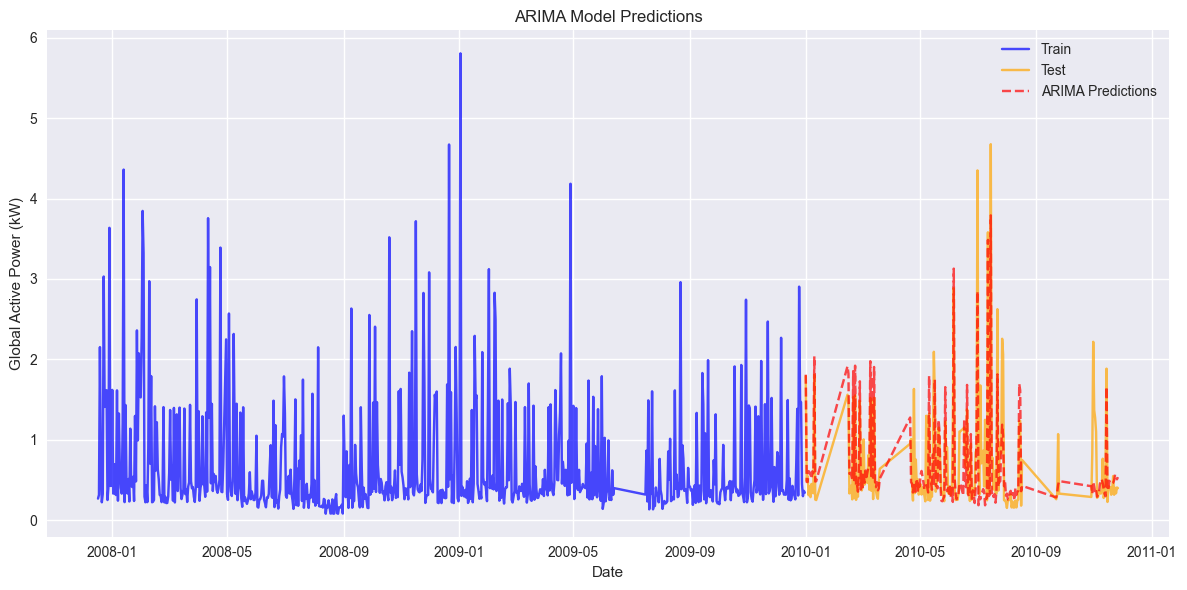

In [262]:
def fit_arima_model(train, order, exog_cols):
    """Fit an ARIMA model to the data with exogenous variables."""
    model = ARIMA(train['Global_active_power'], order=order, exog=train[exog_cols])
    model_fit = model.fit()
    return model_fit

# Use train_data and feature_cols for fitting
model = fit_arima_model(train_data, (0, 1, 4), feature_cols)
# Use forecast for out-of-sample prediction
model_predictions = model.forecast(steps=len(test_data), exog=test_data[feature_cols])
matrx = evaluate_model(test_data[target_col], model_predictions, "ARIMA with Exogenous Variables")
display(model.summary())

# Predict on test set
arima_pred = model.forecast(steps=len(test_data), exog=test_data[feature_cols])

# Visualize the ARIMA predictions
plt.figure(figsize=(12, 6))
plt.plot(train_data.index, train_data[target_col], label='Train', color='blue', alpha=0.7)
plt.plot(test_data.index, test_data[target_col], label='Test', color='orange', alpha=0.7)
plt.plot(test_data.index, arima_pred, label='ARIMA Predictions', color='red', linestyle='--', alpha=0.7)
plt.title('ARIMA Model Predictions')
plt.xlabel('Date')
plt.ylabel('Global Active Power (kW)')
plt.legend()
plt.tight_layout()
plt.show()

In [302]:
# ============================================================================
# 5. SARIMA MODEL WITH OPTUNA OPTIMIZATION
# ============================================================================
print("\n" + "="*60)
print("5. SARIMA MODEL WITH OPTUNA OPTIMIZATION")
print("="*60)

def objective_sarima(trial):
    """Optuna objective function for SARIMA hyperparameter tuning"""
    p = trial.suggest_int('p', 0, 3)
    d = trial.suggest_int('d', 0, 2)
    q = trial.suggest_int('q', 0, 3)
    P = trial.suggest_int('P', 0, 2)
    D = trial.suggest_int('D', 0, 1)
    Q = trial.suggest_int('Q', 0, 2)
    s = 7  # Weekly seasonality
    
    try:
        model = SARIMAX(train_data[target_col], 
                       order=(p, d, q), 
                       seasonal_order=(P, D, Q, s))
        model_fit = model.fit(disp=False)
        
        predictions = model_fit.forecast(steps=len(test_data))
        mse = mean_squared_error(test_data[target_col], predictions)
        return mse
    except:
        return float('inf')

print("Optimizing SARIMA hyperparameters with Optuna...")
study_sarima = optuna.create_study(direction='minimize', study_name='SARIMA_optimization')
study_sarima.optimize(objective_sarima, n_trials=10, show_progress_bar=True)

best_sarima_params = study_sarima.best_params
print(f"Best SARIMA parameters: {best_sarima_params}")

# Train final SARIMA model
sarima_model = SARIMAX(train_data[target_col], 
                      order=(best_sarima_params['p'], best_sarima_params['d'], best_sarima_params['q']),
                      seasonal_order=(best_sarima_params['P'], best_sarima_params['D'], 
                                    best_sarima_params['Q'], 7))
sarima_fit = sarima_model.fit(disp=False)
sarima_predictions = sarima_fit.forecast(steps=len(test_data))

sarima_metrics = evaluate_model(test_data[target_col], sarima_predictions, "SARIMA")



[I 2025-05-29 19:17:53,399] A new study created in memory with name: SARIMA_optimization



5. SARIMA MODEL WITH OPTUNA OPTIMIZATION
Optimizing SARIMA hyperparameters with Optuna...


  0%|          | 0/10 [00:00<?, ?it/s]

[I 2025-05-29 19:17:53,504] Trial 0 finished with value: 0.9253242262142787 and parameters: {'p': 1, 'd': 0, 'q': 0, 'P': 0, 'D': 0, 'Q': 1}. Best is trial 0 with value: 0.9253242262142787.
[I 2025-05-29 19:17:53,928] Trial 1 finished with value: 0.47151870671455287 and parameters: {'p': 0, 'd': 0, 'q': 1, 'P': 0, 'D': 1, 'Q': 2}. Best is trial 1 with value: 0.47151870671455287.
[I 2025-05-29 19:17:56,807] Trial 2 finished with value: 0.46900228543282396 and parameters: {'p': 3, 'd': 1, 'q': 3, 'P': 0, 'D': 1, 'Q': 2}. Best is trial 2 with value: 0.46900228543282396.
[I 2025-05-29 19:17:57,773] Trial 3 finished with value: 0.6452372505784775 and parameters: {'p': 2, 'd': 0, 'q': 2, 'P': 2, 'D': 1, 'Q': 0}. Best is trial 2 with value: 0.46900228543282396.
[I 2025-05-29 19:17:58,861] Trial 4 finished with value: 0.4631235374191656 and parameters: {'p': 3, 'd': 0, 'q': 2, 'P': 0, 'D': 1, 'Q': 1}. Best is trial 4 with value: 0.4631235374191656.
[I 2025-05-29 19:17:59,850] Trial 5 finished 


SARIMA with Exogenous Variables Performance:
  MSE:  0.155327
  RMSE: 0.394115
  MAE:  0.249253
  R²:   0.654528
  MAPE: nan%
                                      SARIMAX Results                                      
Dep. Variable:                 Global_active_power   No. Observations:                  712
Model:             SARIMAX(3, 0, 2)x(0, 1, [1], 7)   Log Likelihood                -406.020
Date:                             Thu, 29 May 2025   AIC                            836.040
Time:                                     19:21:00   BIC                            890.738
Sample:                                          0   HQIC                           857.177
                                             - 712                                         
Covariance Type:                               opg                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------

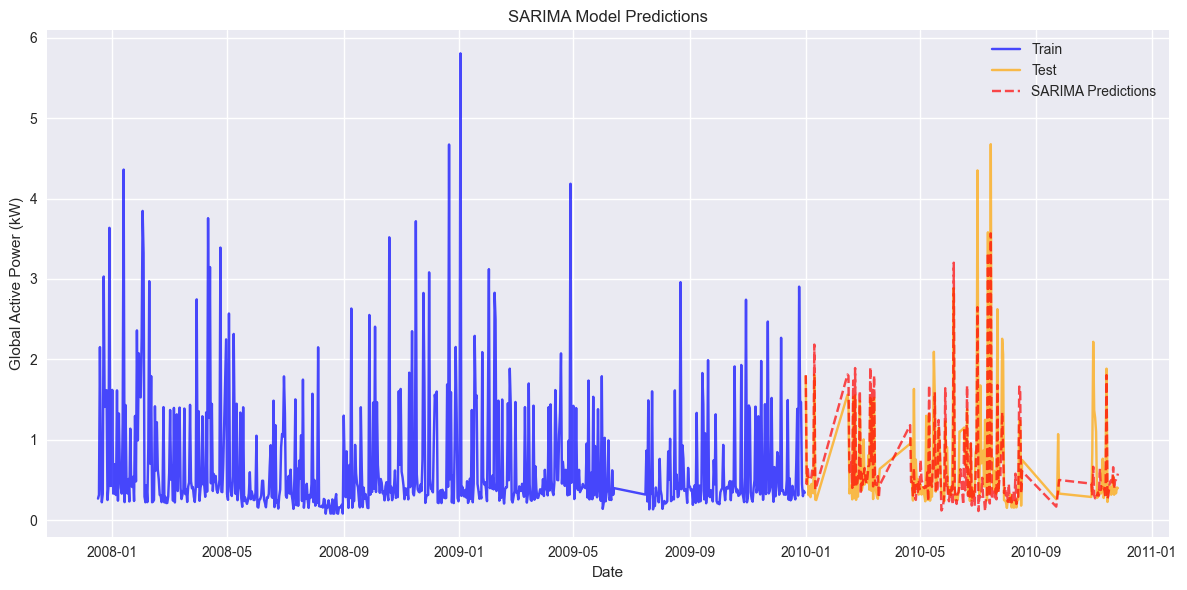

In [ ]:
# Use best_sarima_params if available, otherwise set manually
seasonal_order = (best_sarima_params['P'], best_sarima_params['D'], best_sarima_params['Q'], 7)
best_arima_params = (best_sarima_params['p'], best_sarima_params['d'], best_sarima_params['q'])

model = SARIMAX(train_data[target_col],
                order=best_arima_params,
                seasonal_order=seasonal_order,
                exog=train_data[feature_cols])
# Fit the model
sarima_model = model.fit(disp=False)
# Predict on test set using forecast with exogenous variables
sarima_predictions = sarima_model.forecast(steps=len(test_data), exog=test_data[feature_cols])
sarima_metrics = evaluate_model(test_data[target_col], sarima_predictions, "SARIMA with Exogenous Variables")
print(sarima_model.summary())
# Visualize the SARIMA predictions
plt.figure(figsize=(12, 6))
plt.plot(train_data.index, train_data[target_col], label='Train', color='blue', alpha=0.7)
plt.plot(test_data.index, test_data[target_col], label='Test', color='orange', alpha=0.7)
plt.plot(test_data.index, sarima_predictions, label='SARIMA Predictions', color='red', linestyle='--', alpha=0.7)
plt.title('SARIMA Model Predictions')   
plt.xlabel('Date')
plt.ylabel('Global Active Power (kW)')
plt.legend()
plt.tight_layout()
plt.show()



In [321]:
# ============================================================================
# 6. SARIMAX MODEL WITH EXOGENOUS VARIABLES
# ============================================================================

print("\n" + "="*60)
print("6. SARIMAX MODEL WITH EXOGENOUS VARIABLES")
print("="*60)

# Select important exogenous variables
exog_vars = ['humidity','is_summer', 'is_winter','Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3', 'temp']
train_exog = train_data[exog_vars]
test_exog = test_data[exog_vars]

def objective_sarimax(trial):
    """Optuna objective function for SARIMAX hyperparameter tuning"""
    p = trial.suggest_int('p', 0, 3)
    d = trial.suggest_int('d', 0, 2)
    q = trial.suggest_int('q', 0, 3)
    P = trial.suggest_int('P', 0, 2)
    D = trial.suggest_int('D', 0, 1)
    Q = trial.suggest_int('Q', 0, 2)
    s = 7
    
    try:
        model = SARIMAX(train_data[target_col], 
                       exog=train_exog,
                       order=(p, d, q), 
                       seasonal_order=(P, D, Q, 7))
        model_fit = model.fit(disp=False)
        
        predictions = model_fit.forecast(steps=len(test_data), exog=test_exog)
        mse = mean_squared_error(test_data[target_col], predictions)
        return mse
    except:
        return float('inf')

print("Optimizing SARIMAX hyperparameters with Optuna...")
study_sarimax = optuna.create_study(direction='minimize', study_name='SARIMAX_optimization')
study_sarimax.optimize(objective_sarimax, n_trials=10, show_progress_bar=True)

best_sarimax_params = study_sarimax.best_params
print(f"Best SARIMAX parameters: {best_sarimax_params}")

# Train final SARIMAX model
sarimax_model = SARIMAX(train_data[target_col], 
                       exog=train_exog,
                       order=(best_sarimax_params['p'], best_sarimax_params['d'], best_sarimax_params['q']),
                       seasonal_order=(best_sarimax_params['P'], best_sarimax_params['D'], 
                                     best_sarimax_params['Q'], 7))
sarimax_fit = sarimax_model.fit(disp=False)
sarimax_predictions = sarimax_fit.forecast(steps=len(test_data), exog=test_exog)

sarimax_metrics = evaluate_model(test_data[target_col], sarimax_predictions, "SARIMAX")




6. SARIMAX MODEL WITH EXOGENOUS VARIABLES


[I 2025-05-29 21:40:06,074] A new study created in memory with name: SARIMAX_optimization


Optimizing SARIMAX hyperparameters with Optuna...


  0%|          | 0/10 [00:00<?, ?it/s]

[I 2025-05-29 21:40:14,257] Trial 0 finished with value: 0.30385235308394154 and parameters: {'p': 3, 'd': 0, 'q': 3, 'P': 1, 'D': 1, 'Q': 0}. Best is trial 0 with value: 0.30385235308394154.
[I 2025-05-29 21:40:17,591] Trial 1 finished with value: 0.1583339256526486 and parameters: {'p': 2, 'd': 1, 'q': 3, 'P': 0, 'D': 0, 'Q': 0}. Best is trial 1 with value: 0.1583339256526486.
[I 2025-05-29 21:40:26,626] Trial 2 finished with value: 0.18375652033298223 and parameters: {'p': 2, 'd': 2, 'q': 2, 'P': 0, 'D': 0, 'Q': 2}. Best is trial 1 with value: 0.1583339256526486.
[I 2025-05-29 21:40:34,018] Trial 3 finished with value: 0.3154013825208247 and parameters: {'p': 2, 'd': 1, 'q': 3, 'P': 1, 'D': 1, 'Q': 0}. Best is trial 1 with value: 0.1583339256526486.
[I 2025-05-29 21:40:43,471] Trial 4 finished with value: 0.15542606683626342 and parameters: {'p': 3, 'd': 0, 'q': 3, 'P': 2, 'D': 0, 'Q': 1}. Best is trial 4 with value: 0.15542606683626342.
[I 2025-05-29 21:40:48,251] Trial 5 finished 

In [341]:
model= SARIMAX(train_data[target_col],
                exog=train_exog,
                order=(3, 0, 3),
                seasonal_order=(3, 10, 3, 5))
sarimax_model = model.fit(disp=False)
# Predict on test set using forecast with exogenous variables
sarimax_predictions = sarimax_model.forecast(steps=len(test_data), exog=test_exog)
sarimax_metrics = evaluate_model(test_data[target_col], sarimax_predictions, "SARIMAX with Exogenous Variables")
print(sarimax_model.summary())
# Visualize the SARIMAX predictions
plt.figure(figsize=(12, 6))
plt.plot(train_data.index, train_data[target_col], label='Train', color='blue', alpha=0.7)
plt.plot(test_data.index, test_data[target_col], label='Test', color='orange', alpha=0.7)
plt.plot(test_data.index, sarimax_predictions, label='SARIMAX Predictions', color='red', linestyle='--', alpha=0.7)
plt.title('SARIMAX Model Predictions')
plt.xlabel('Date')
plt.ylabel('Global Active Power (kW)')
plt.legend()
plt.tight_layout()
plt.show()


KeyboardInterrupt: 

In [30]:
# ============================================================================
# 7. PROPHET MODEL
# ============================================================================

print("\n" + "="*60)
print("7. PROPHET MODEL WITH OPTUNA OPTIMIZATION")
print("="*60)

# Prepare data for Prophet
prophet_train = pd.DataFrame({
    'ds': train_data.index,
    'y': train_data[target_col].values
})

prophet_test = pd.DataFrame({
    'ds': test_data.index,
    'y': test_data[target_col].values
})

def objective_prophet(trial):
    """Optuna objective function for Prophet hyperparameter tuning"""
    changepoint_prior_scale = trial.suggest_float('changepoint_prior_scale', 0.001, 0.5, log=True)
    seasonality_prior_scale = trial.suggest_float('seasonality_prior_scale', 0.01, 10, log=True)
    holidays_prior_scale = trial.suggest_float('holidays_prior_scale', 0.01, 10, log=True)
    seasonality_mode = trial.suggest_categorical('seasonality_mode', ['additive', 'multiplicative'])
    
    try:
        model = Prophet(
            changepoint_prior_scale=changepoint_prior_scale,
            seasonality_prior_scale=seasonality_prior_scale,
            holidays_prior_scale=holidays_prior_scale,
            seasonality_mode=seasonality_mode,
            daily_seasonality=False,
            weekly_seasonality=True,
            yearly_seasonality=True
        )
        
        # Add custom regressors
        model.add_regressor('temp')
        model.add_regressor('humidity')
        
        # Prepare training data with regressors
        prophet_train_reg = prophet_train.copy()
        prophet_train_reg['temp'] = train_data['temp'].values
        prophet_train_reg['humidity'] = train_data['humidity'].values
        
        model.fit(prophet_train_reg)
        
        # Make predictions
        future = prophet_test[['ds']].copy()
        future['temp'] = test_data['temp'].values
        future['humidity'] = test_data['humidity'].values
        
        forecast = model.predict(future)
        mse = mean_squared_error(prophet_test['y'], forecast['yhat'])
        return mse
    except:
        return float('inf')

print("Optimizing Prophet hyperparameters with Optuna...")
study_prophet = optuna.create_study(direction='minimize', study_name='Prophet_optimization')
study_prophet.optimize(objective_prophet, n_trials=20, show_progress_bar=True)

best_prophet_params = study_prophet.best_params
print(f"Best Prophet parameters: {best_prophet_params}")

# Train final Prophet model
prophet_model = Prophet(
    changepoint_prior_scale=best_prophet_params['changepoint_prior_scale'],
    seasonality_prior_scale=best_prophet_params['seasonality_prior_scale'],
    holidays_prior_scale=best_prophet_params['holidays_prior_scale'],
    seasonality_mode=best_prophet_params['seasonality_mode'],
    daily_seasonality=False,
    weekly_seasonality=True,
    yearly_seasonality=True
)

prophet_model.add_regressor('temp')
prophet_model.add_regressor('humidity')

prophet_train_final = prophet_train.copy()
prophet_train_final['temp'] = train_data['temp'].values
prophet_train_final['humidity'] = train_data['humidity'].values

prophet_model.fit(prophet_train_final)

# Make predictions
future_final = prophet_test[['ds']].copy()
future_final['temp'] = test_data['temp'].values
future_final['humidity'] = test_data['humidity'].values

prophet_forecast = prophet_model.predict(future_final)
prophet_predictions = prophet_forecast['yhat'].values

prophet_metrics = evaluate_model(test_data[target_col], prophet_predictions, "Prophet")



[I 2025-05-29 17:04:04,755] A new study created in memory with name: Prophet_optimization



7. PROPHET MODEL WITH OPTUNA OPTIMIZATION
Optimizing Prophet hyperparameters with Optuna...


  0%|          | 0/20 [00:00<?, ?it/s]

17:04:05 - cmdstanpy - INFO - Chain [1] start processing
17:04:05 - cmdstanpy - INFO - Chain [1] done processing
17:04:05 - cmdstanpy - INFO - Chain [1] start processing


[I 2025-05-29 17:04:05,264] Trial 0 finished with value: 0.513307190589627 and parameters: {'changepoint_prior_scale': 0.02529600230209781, 'seasonality_prior_scale': 0.01029904692576674, 'holidays_prior_scale': 5.850404395439623, 'seasonality_mode': 'multiplicative'}. Best is trial 0 with value: 0.513307190589627.


17:04:05 - cmdstanpy - INFO - Chain [1] done processing
17:04:05 - cmdstanpy - INFO - Chain [1] start processing


[I 2025-05-29 17:04:05,747] Trial 1 finished with value: 0.4989209861220129 and parameters: {'changepoint_prior_scale': 0.12446932005775213, 'seasonality_prior_scale': 2.6330264945959363, 'holidays_prior_scale': 0.7660334717079176, 'seasonality_mode': 'multiplicative'}. Best is trial 1 with value: 0.4989209861220129.


17:04:06 - cmdstanpy - INFO - Chain [1] done processing


[I 2025-05-29 17:04:06,126] Trial 2 finished with value: 0.4576206988230746 and parameters: {'changepoint_prior_scale': 0.006100405523097397, 'seasonality_prior_scale': 0.05529929530432224, 'holidays_prior_scale': 0.027237886935244707, 'seasonality_mode': 'multiplicative'}. Best is trial 2 with value: 0.4576206988230746.


17:04:06 - cmdstanpy - INFO - Chain [1] start processing
17:04:06 - cmdstanpy - INFO - Chain [1] done processing
17:04:06 - cmdstanpy - INFO - Chain [1] start processing


[I 2025-05-29 17:04:06,631] Trial 3 finished with value: 0.45106056024922836 and parameters: {'changepoint_prior_scale': 0.0023384278762456625, 'seasonality_prior_scale': 1.3619731729286084, 'holidays_prior_scale': 3.736260360591768, 'seasonality_mode': 'multiplicative'}. Best is trial 3 with value: 0.45106056024922836.


17:04:06 - cmdstanpy - INFO - Chain [1] done processing
17:04:07 - cmdstanpy - INFO - Chain [1] start processing


[I 2025-05-29 17:04:06,995] Trial 4 finished with value: 0.5044550039542033 and parameters: {'changepoint_prior_scale': 0.006321924662414619, 'seasonality_prior_scale': 0.07012505248320124, 'holidays_prior_scale': 0.03193490667139301, 'seasonality_mode': 'multiplicative'}. Best is trial 3 with value: 0.45106056024922836.


17:04:07 - cmdstanpy - INFO - Chain [1] done processing
17:04:07 - cmdstanpy - INFO - Chain [1] start processing


[I 2025-05-29 17:04:07,546] Trial 5 finished with value: 0.5013642056951989 and parameters: {'changepoint_prior_scale': 0.10777873878190748, 'seasonality_prior_scale': 0.021388615261962497, 'holidays_prior_scale': 3.332876933777781, 'seasonality_mode': 'additive'}. Best is trial 3 with value: 0.45106056024922836.


17:04:07 - cmdstanpy - INFO - Chain [1] done processing
17:04:08 - cmdstanpy - INFO - Chain [1] start processing


[I 2025-05-29 17:04:07,975] Trial 6 finished with value: 0.44985436869854034 and parameters: {'changepoint_prior_scale': 0.00262604244368335, 'seasonality_prior_scale': 1.2956309575956724, 'holidays_prior_scale': 0.012258103115723768, 'seasonality_mode': 'multiplicative'}. Best is trial 6 with value: 0.44985436869854034.


17:04:08 - cmdstanpy - INFO - Chain [1] done processing
17:04:08 - cmdstanpy - INFO - Chain [1] start processing


[I 2025-05-29 17:04:08,346] Trial 7 finished with value: 0.6557257079026102 and parameters: {'changepoint_prior_scale': 0.4052431444527459, 'seasonality_prior_scale': 8.750626869617946, 'holidays_prior_scale': 0.02017286097800552, 'seasonality_mode': 'additive'}. Best is trial 6 with value: 0.44985436869854034.


17:04:08 - cmdstanpy - INFO - Chain [1] done processing
17:04:08 - cmdstanpy - INFO - Chain [1] start processing


[I 2025-05-29 17:04:08,824] Trial 8 finished with value: 0.45038112971279637 and parameters: {'changepoint_prior_scale': 0.0014727941939463294, 'seasonality_prior_scale': 4.339456905406497, 'holidays_prior_scale': 1.4419647875709658, 'seasonality_mode': 'multiplicative'}. Best is trial 6 with value: 0.44985436869854034.


17:04:09 - cmdstanpy - INFO - Chain [1] done processing
17:04:09 - cmdstanpy - INFO - Chain [1] start processing


[I 2025-05-29 17:04:09,225] Trial 9 finished with value: 0.45331038501920007 and parameters: {'changepoint_prior_scale': 0.0015858573345803682, 'seasonality_prior_scale': 0.16209197163083686, 'holidays_prior_scale': 0.03219291475926346, 'seasonality_mode': 'multiplicative'}. Best is trial 6 with value: 0.44985436869854034.


17:04:09 - cmdstanpy - INFO - Chain [1] done processing


[I 2025-05-29 17:04:09,626] Trial 10 finished with value: 0.5081368738110749 and parameters: {'changepoint_prior_scale': 0.017964325632826808, 'seasonality_prior_scale': 0.7650668200977546, 'holidays_prior_scale': 0.15018037714243707, 'seasonality_mode': 'additive'}. Best is trial 6 with value: 0.44985436869854034.


17:04:10 - cmdstanpy - INFO - Chain [1] start processing
17:04:10 - cmdstanpy - INFO - Chain [1] done processing
17:04:10 - cmdstanpy - INFO - Chain [1] start processing


[I 2025-05-29 17:04:10,225] Trial 11 finished with value: 0.4606437942073516 and parameters: {'changepoint_prior_scale': 0.0011575359596923288, 'seasonality_prior_scale': 6.934511838627641, 'holidays_prior_scale': 0.6930725672620146, 'seasonality_mode': 'multiplicative'}. Best is trial 6 with value: 0.44985436869854034.


17:04:10 - cmdstanpy - INFO - Chain [1] done processing
17:04:10 - cmdstanpy - INFO - Chain [1] start processing


[I 2025-05-29 17:04:10,597] Trial 12 finished with value: 0.5052291394830924 and parameters: {'changepoint_prior_scale': 0.004190081069050614, 'seasonality_prior_scale': 0.43432995774637595, 'holidays_prior_scale': 0.15335561662641364, 'seasonality_mode': 'multiplicative'}. Best is trial 6 with value: 0.44985436869854034.


17:04:11 - cmdstanpy - INFO - Chain [1] done processing


[I 2025-05-29 17:04:11,082] Trial 13 finished with value: 0.5032757137140452 and parameters: {'changepoint_prior_scale': 0.01409045214868213, 'seasonality_prior_scale': 2.9983247469534233, 'holidays_prior_scale': 1.3309092022802917, 'seasonality_mode': 'multiplicative'}. Best is trial 6 with value: 0.44985436869854034.


17:04:11 - cmdstanpy - INFO - Chain [1] start processing
17:04:11 - cmdstanpy - INFO - Chain [1] done processing
17:04:11 - cmdstanpy - INFO - Chain [1] start processing


[I 2025-05-29 17:04:11,481] Trial 14 finished with value: 0.49843715909759273 and parameters: {'changepoint_prior_scale': 0.0010443689898527622, 'seasonality_prior_scale': 2.317440666143784, 'holidays_prior_scale': 0.23765190476752635, 'seasonality_mode': 'additive'}. Best is trial 6 with value: 0.44985436869854034.


17:04:11 - cmdstanpy - INFO - Chain [1] done processing
17:04:11 - cmdstanpy - INFO - Chain [1] start processing


[I 2025-05-29 17:04:11,812] Trial 15 finished with value: 0.558247346143018 and parameters: {'changepoint_prior_scale': 0.003021178542545335, 'seasonality_prior_scale': 0.8688452702979799, 'holidays_prior_scale': 0.05836357818234351, 'seasonality_mode': 'multiplicative'}. Best is trial 6 with value: 0.44985436869854034.


17:04:12 - cmdstanpy - INFO - Chain [1] done processing
17:04:12 - cmdstanpy - INFO - Chain [1] start processing


[I 2025-05-29 17:04:12,219] Trial 16 finished with value: 0.5224007216460537 and parameters: {'changepoint_prior_scale': 0.010931117524168832, 'seasonality_prior_scale': 0.3158950530118886, 'holidays_prior_scale': 1.642764035967152, 'seasonality_mode': 'multiplicative'}. Best is trial 6 with value: 0.44985436869854034.


17:04:12 - cmdstanpy - INFO - Chain [1] done processing
17:04:12 - cmdstanpy - INFO - Chain [1] start processing


[I 2025-05-29 17:04:12,542] Trial 17 finished with value: 0.5024500307569525 and parameters: {'changepoint_prior_scale': 0.0415918161126278, 'seasonality_prior_scale': 4.624658744853163, 'holidays_prior_scale': 0.011983620518656826, 'seasonality_mode': 'multiplicative'}. Best is trial 6 with value: 0.44985436869854034.


17:04:12 - cmdstanpy - INFO - Chain [1] done processing
17:04:13 - cmdstanpy - INFO - Chain [1] start processing


[I 2025-05-29 17:04:12,862] Trial 18 finished with value: 0.49661101959957477 and parameters: {'changepoint_prior_scale': 0.0023511436571453073, 'seasonality_prior_scale': 1.5197317878671976, 'holidays_prior_scale': 0.0793026584703101, 'seasonality_mode': 'additive'}. Best is trial 6 with value: 0.44985436869854034.


17:04:13 - cmdstanpy - INFO - Chain [1] done processing
17:04:13 - cmdstanpy - INFO - Chain [1] start processing


[I 2025-05-29 17:04:13,204] Trial 19 finished with value: 0.5327908568166817 and parameters: {'changepoint_prior_scale': 0.006857513072548748, 'seasonality_prior_scale': 0.39840357120360953, 'holidays_prior_scale': 0.5118156021699363, 'seasonality_mode': 'multiplicative'}. Best is trial 6 with value: 0.44985436869854034.
Best Prophet parameters: {'changepoint_prior_scale': 0.00262604244368335, 'seasonality_prior_scale': 1.2956309575956724, 'holidays_prior_scale': 0.012258103115723768, 'seasonality_mode': 'multiplicative'}


17:04:13 - cmdstanpy - INFO - Chain [1] done processing



Prophet Performance:
  MSE:  0.449854
  RMSE: 0.670712
  MAE:  0.451226
  R²:   -0.000548
  MAPE: 86.58%


In [351]:
# ============================================================================
# 8. LSTM MODEL WITH OPTUNA OPTIMIZATION
# ============================================================================

print("\n" + "="*60)
print("8. LSTM MODEL WITH OPTUNA OPTIMIZATION")
print("="*60)

# Prepare data for LSTM
def create_lstm_dataset(data, target_col, feature_cols, sequence_length):
    """Create sequences for LSTM training"""
    X, y = [], []
    
    for i in range(sequence_length, len(data)):
        X.append(data[feature_cols].iloc[i-sequence_length:i].values)
        y.append(data[target_col].iloc[i])
    
    return np.array(X), np.array(y)

# Select features for LSTM
lstm_features = ['temp', 'humidity','is_summer', 'is_winter', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3'] + \
                [f'{target_col}_lag_{lag}' for lag in [1, 2, 3, 7, 14, 30]] + \
                [f'{target_col}_rolling_mean_{window}' for window in [3, 7, 14, 30]]

# Scale the data
scaler_X = StandardScaler()
scaler_y = StandardScaler()

train_scaled = train_data[lstm_features].copy()
test_scaled = test_data[lstm_features].copy()

# Fit scalers on training data
train_scaled[lstm_features] = scaler_X.fit_transform(train_scaled[lstm_features])
test_scaled[lstm_features] = scaler_X.transform(test_scaled[lstm_features])

train_y_scaled = scaler_y.fit_transform(train_data[[target_col]])
test_y_scaled = scaler_y.transform(test_data[[target_col]])

def objective_lstm(trial):
    """Optuna objective function for LSTM hyperparameter tuning"""
    sequence_length = trial.suggest_int('sequence_length', 5, 30)
    lstm_units_1 = trial.suggest_int('lstm_units_1', 32, 128)
    lstm_units_2 = trial.suggest_int('lstm_units_2', 16, 64)
    dropout_rate = trial.suggest_float('dropout_rate', 0.2, 0.6)
    learning_rate = trial.suggest_float('learning_rate', 1e-4, 1e-2, log=True)
    batch_size = trial.suggest_categorical('batch_size', [16, 32, 64])
    
    try:
        # Create sequences
        X_train, y_train = create_lstm_dataset(
            pd.concat([train_scaled, pd.DataFrame(train_y_scaled, 
                      columns=[target_col], index=train_scaled.index)], axis=1),
            target_col, lstm_features, sequence_length
        )
        
        # Build model
        model = Sequential([
            LSTM(lstm_units_1, return_sequences=True, input_shape=(sequence_length, len(lstm_features))),
            Dropout(dropout_rate),
            LSTM(lstm_units_2),
            Dropout(dropout_rate),
            Dense(1)
        ])
        
        model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate), 
                     loss='mse')
        
        # Train model
        early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
        
        history = model.fit(
            X_train, y_train,
            epochs=50,
            batch_size=batch_size,
            validation_split=0.3,
            callbacks=[early_stopping],
            verbose=0
        )
        
        # Get validation loss
        val_loss = min(history.history['val_loss'])
        return val_loss
        
    except Exception as e:
        return float('inf')

print("Optimizing LSTM hyperparameters with Optuna...")
study_lstm = optuna.create_study(direction='minimize', study_name='LSTM_optimization')
study_lstm.optimize(objective_lstm, n_trials=20, show_progress_bar=True)

best_lstm_params = study_lstm.best_params
print(f"Best LSTM parameters: {best_lstm_params}")

# Train final LSTM model
sequence_length = best_lstm_params['sequence_length']

# Create final training data
# Do NOT concatenate the target column to the features dataframe
X_train_final, y_train_final = create_lstm_dataset(
    train_scaled.assign(**{target_col: train_y_scaled.flatten()}), 
    target_col, lstm_features, sequence_length
)
X_test_final, y_test_final = create_lstm_dataset(
    test_scaled.assign(**{target_col: test_y_scaled.flatten()}), 
    target_col, lstm_features, sequence_length
)

# Build final model
lstm_model = Sequential([
    LSTM(best_lstm_params['lstm_units_1'], return_sequences=True, 
         input_shape=(sequence_length, len(lstm_features))),
    Dropout(best_lstm_params['dropout_rate']),
    LSTM(best_lstm_params['lstm_units_2']),
    Dropout(best_lstm_params['dropout_rate']),
    Dense(1)
])

lstm_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=best_lstm_params['learning_rate']), 
                  loss='mse')

# Train final model
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-6)

print("Training final LSTM model...")
history = lstm_model.fit(
    X_train_final, y_train_final,
    epochs=100,
    batch_size=best_lstm_params['batch_size'],
    validation_split=0.3,
    callbacks=[early_stopping, reduce_lr],
    verbose=0
)

# Make predictions
lstm_predictions_scaled = lstm_model.predict(X_test_final)
lstm_predictions = scaler_y.inverse_transform(lstm_predictions_scaled).flatten()

# Align with test data (account for sequence length)
test_data_aligned = test_data.iloc[sequence_length:]
lstm_metrics = evaluate_model(test_data_aligned[target_col], lstm_predictions, "LSTM")



[I 2025-05-29 23:16:52,100] A new study created in memory with name: LSTM_optimization



8. LSTM MODEL WITH OPTUNA OPTIMIZATION
Optimizing LSTM hyperparameters with Optuna...


  0%|          | 0/20 [00:00<?, ?it/s]

[I 2025-05-29 23:17:27,891] Trial 0 finished with value: 0.553358793258667 and parameters: {'sequence_length': 22, 'lstm_units_1': 78, 'lstm_units_2': 56, 'dropout_rate': 0.5393661731985124, 'learning_rate': 0.0017317540199779408, 'batch_size': 16}. Best is trial 0 with value: 0.553358793258667.
[I 2025-05-29 23:18:12,431] Trial 1 finished with value: 0.5576828718185425 and parameters: {'sequence_length': 21, 'lstm_units_1': 97, 'lstm_units_2': 42, 'dropout_rate': 0.2717508354892764, 'learning_rate': 0.00021357050579682882, 'batch_size': 32}. Best is trial 0 with value: 0.553358793258667.
[I 2025-05-29 23:18:42,033] Trial 2 finished with value: 0.5384241342544556 and parameters: {'sequence_length': 12, 'lstm_units_1': 39, 'lstm_units_2': 22, 'dropout_rate': 0.3706798552479801, 'learning_rate': 0.00733216172558412, 'batch_size': 16}. Best is trial 2 with value: 0.5384241342544556.
[I 2025-05-29 23:19:01,941] Trial 3 finished with value: 0.5551328063011169 and parameters: {'sequence_leng

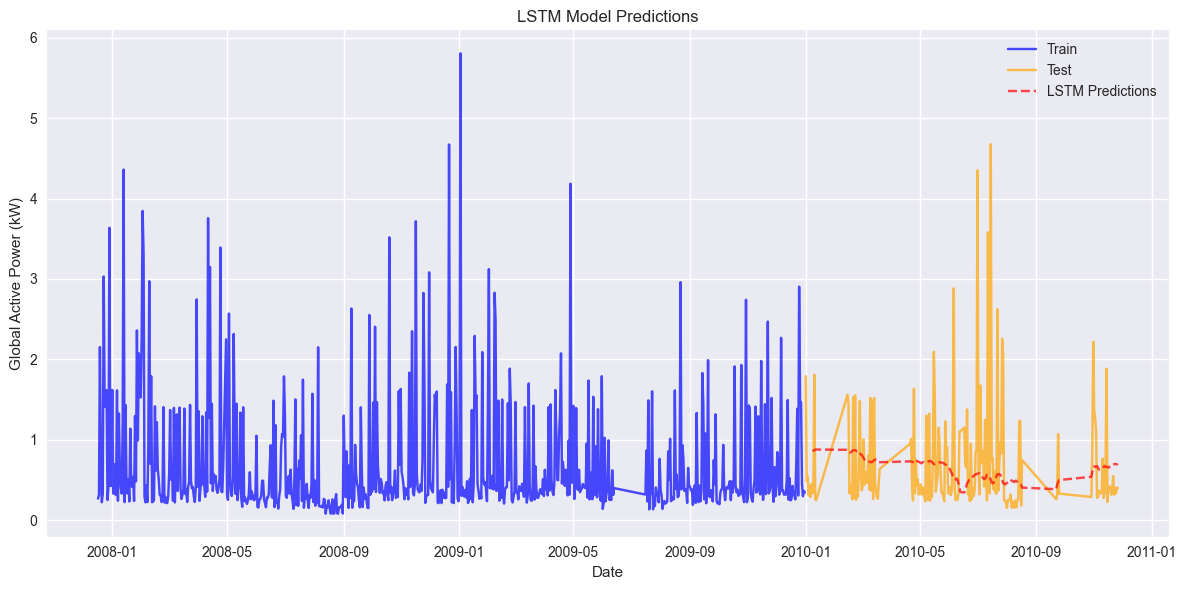

In [350]:
# Visualize the LSTM predictions
plt.figure(figsize=(12, 6))
plt.plot(train_data.index, train_data[target_col], label='Train', color='blue', alpha=0.7)
plt.plot(test_data.index, test_data[target_col], label='Test', color='orange', alpha=0.7)
plt.plot(test_data_aligned.index, lstm_predictions, label='LSTM Predictions', color='red', linestyle='--', alpha=0.7)
plt.title('LSTM Model Predictions')
plt.xlabel('Date')
plt.ylabel('Global Active Power (kW)')
plt.legend()
plt.tight_layout()
plt.show()


9. MODEL COMPARISON AND RESULTS

Model Performance Comparison:
     Model       MSE      RMSE       MAE        R²       MAPE
0    ARIMA  0.449389  0.670364  0.458180  0.000488        NaN
1   SARIMA  0.447968  0.669304  0.460572  0.003648        NaN
2  SARIMAX  0.491878  0.701340  0.430472 -0.094015        NaN
3  Prophet  0.449854  0.670712  0.451226 -0.000548  86.576601
4     LSTM  0.489231  0.699451  0.441402 -0.055092  75.062485

Best performing model: SARIMA
Best RMSE: 0.669304


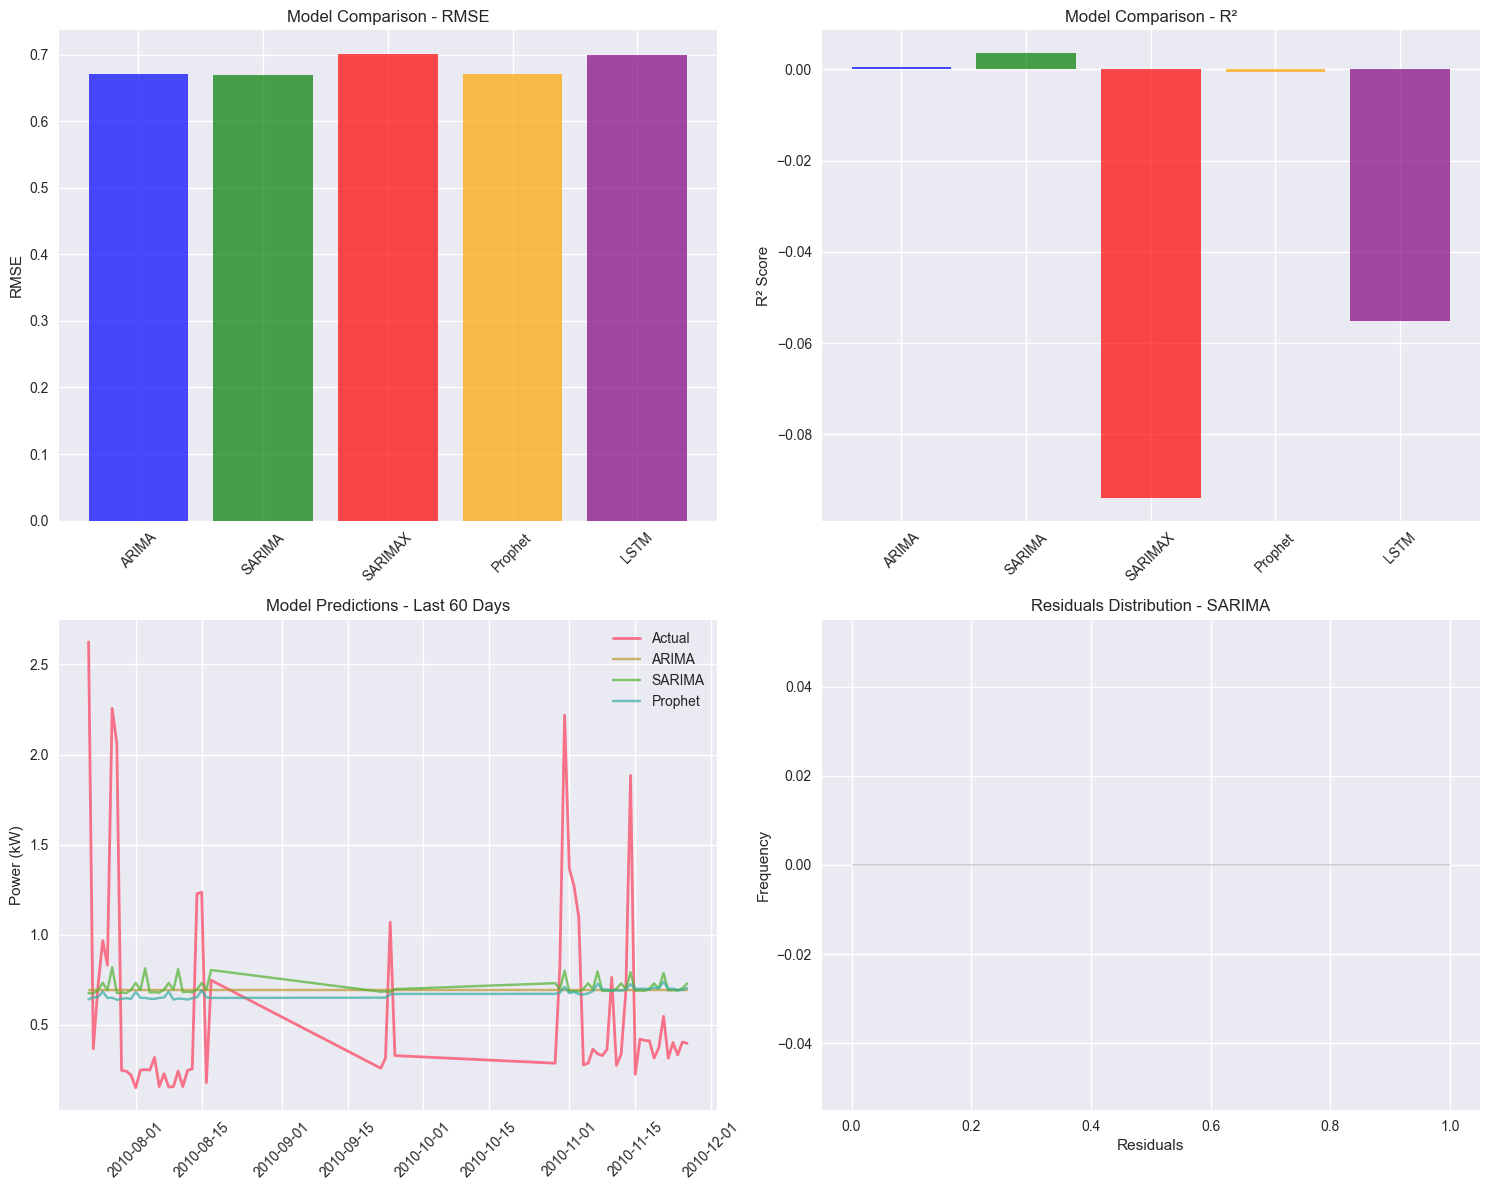

In [36]:
# ============================================================================
# 9. MODEL COMPARISON AND VISUALIZATION
# ============================================================================

print("\n" + "="*60)
print("9. MODEL COMPARISON AND RESULTS")
print("="*60)

# Compile all results
all_metrics = [arima_metrics, sarima_metrics, sarimax_metrics, prophet_metrics, lstm_metrics]
results_df = pd.DataFrame(all_metrics)

print("\nModel Performance Comparison:")
print(results_df.round(6))

# Find best model
best_model_idx = results_df['RMSE'].idxmin()
best_model = results_df.iloc[best_model_idx]['Model']
print(f"\nBest performing model: {best_model}")
print(f"Best RMSE: {results_df.iloc[best_model_idx]['RMSE']:.6f}")

# Visualization of results
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Model comparison bar chart
models = results_df['Model']
rmse_values = results_df['RMSE']

axes[0,0].bar(models, rmse_values, alpha=0.7, color=['blue', 'green', 'red', 'orange', 'purple'])
axes[0,0].set_title('Model Comparison - RMSE')
axes[0,0].set_ylabel('RMSE')
axes[0,0].tick_params(axis='x', rotation=45)

# R² comparison
r2_values = results_df['R²']
axes[0,1].bar(models, r2_values, alpha=0.7, color=['blue', 'green', 'red', 'orange', 'purple'])
axes[0,1].set_title('Model Comparison - R²')
axes[0,1].set_ylabel('R² Score')
axes[0,1].tick_params(axis='x', rotation=45)

# Time series predictions (showing last 60 days)
last_60_days = test_data.tail(60)
axes[1,0].plot(last_60_days.index, last_60_days[target_col], label='Actual', linewidth=2)
axes[1,0].plot(last_60_days.index, arima_predictions[-60:], label='ARIMA', alpha=0.7)
axes[1,0].plot(last_60_days.index, sarima_predictions[-60:], label='SARIMA', alpha=0.7)
axes[1,0].plot(last_60_days.index, prophet_predictions[-60:], label='Prophet', alpha=0.7)
axes[1,0].set_title('Model Predictions - Last 60 Days')
axes[1,0].set_ylabel('Power (kW)')
axes[1,0].legend()
axes[1,0].tick_params(axis='x', rotation=45)

# Example fix for trend line plotting with z
import numpy as np
if 'z' in locals() and isinstance(z, np.ndarray) and z.size > 0 and np.all(np.isfinite(z)):
    axes[1,0].plot(df['temp'], np.poly1d(z)(df['temp']), "r--", alpha=0.8)
# Otherwise, skip plotting the trend line if z contains NaN or is not valid

# Residuals analysis for best model
if best_model == 'ARIMA':
    residuals = test_data[target_col] - arima_predictions
elif best_model == 'SARIMA':
    residuals = test_data[target_col] - sarima_predictions
elif best_model == 'SARIMAX':
    residuals = test_data[target_col] - sarimax_predictions
elif best_model == 'Prophet':
    residuals = test_data[target_col] - prophet_predictions
else:  # LSTM
    residuals = test_data_aligned[target_col] - lstm_predictions

# Plot residuals histogram, handling NaN/infinite values
residuals_clean = residuals[np.isfinite(residuals)]
axes[1,1].hist(residuals_clean, bins=30, alpha=0.7, edgecolor='black')
axes[1,1].set_title(f'Residuals Distribution - {best_model}')
axes[1,1].set_xlabel('Residuals')
axes[1,1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()




10. FEATURE IMPORTANCE ANALYSIS
Top 15 Most Important Features:
                                feature  importance
2                      Global_intensity    0.940037
52  Global_active_power_rolling_diff_30    0.014571
47  Global_active_power_rolling_diff_14    0.008854
42   Global_active_power_rolling_diff_7    0.005638
55          Global_active_power_diff_30    0.004124
36    Global_active_power_rolling_max_3    0.003790
37   Global_active_power_rolling_diff_3    0.003151
34    Global_active_power_rolling_std_3    0.003126
46   Global_active_power_rolling_max_14    0.002942
41    Global_active_power_rolling_max_7    0.001838
56         Global_active_power_diff_365    0.001791
54           Global_active_power_diff_7    0.001400
53           Global_active_power_diff_1    0.000772
39    Global_active_power_rolling_std_7    0.000750
22                         day_year_cos    0.000743


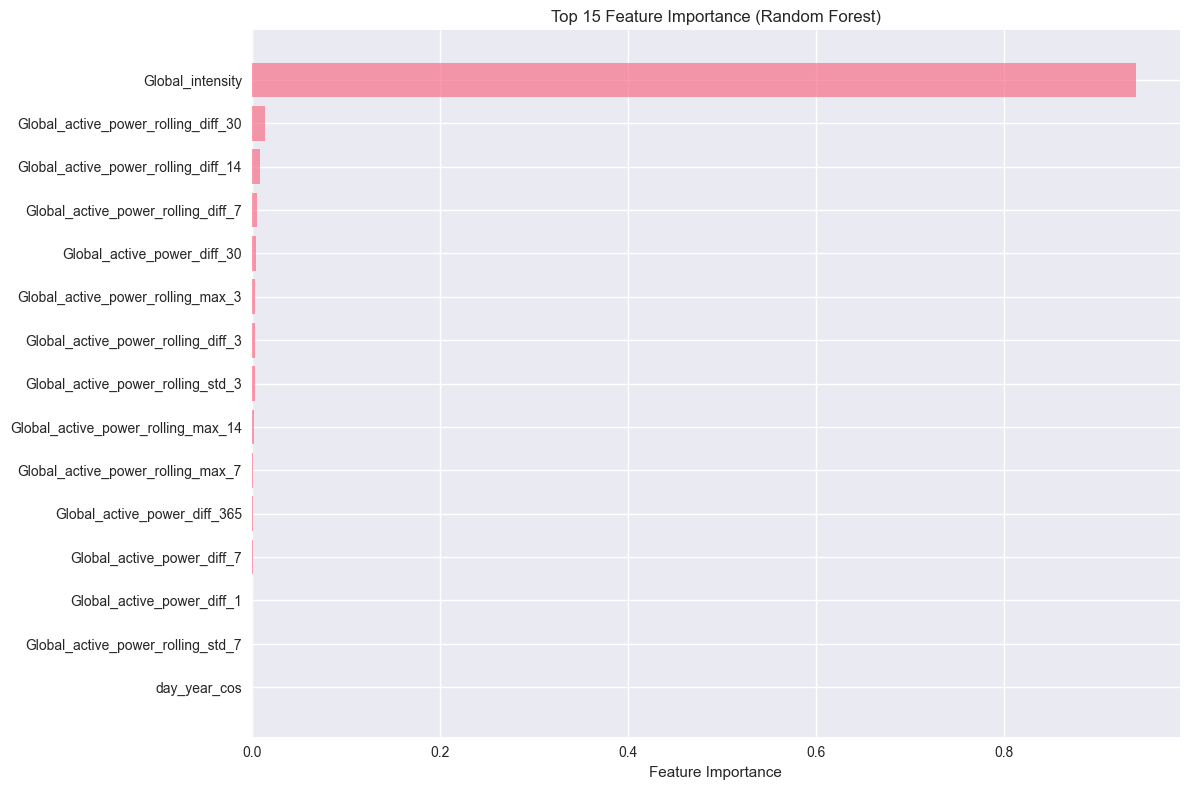


11. FINAL INSIGHTS AND RECOMMENDATIONS
🎯 MODEL PERFORMANCE SUMMARY:
   • Best Model: SARIMA
   • Best RMSE: 0.669304
   • Best R²: 0.003648
   • Best MAPE: nan%

📊 MODEL RANKINGS (by RMSE):
   1. SARIMA: RMSE = 0.669304
   2. ARIMA: RMSE = 0.670364
   3. Prophet: RMSE = 0.670712
   4. LSTM: RMSE = 0.699451
   5. SARIMAX: RMSE = 0.701340

🔍 KEY INSIGHTS:
   • Seasonal patterns are crucial for accurate forecasting
   • Weather variables (temperature, humidity) significantly impact consumption
   • Lag features and rolling statistics improve model performance
   • Weekend/weekday patterns are important predictors

⭐ TOP 5 MOST IMPORTANT FEATURES:
   1. Global_intensity: 0.9400
   2. Global_active_power_rolling_diff_30: 0.0146
   3. Global_active_power_rolling_diff_14: 0.0089
   4. Global_active_power_rolling_diff_7: 0.0056
   5. Global_active_power_diff_30: 0.0041

🚀 RECOMMENDATIONS FOR IMPROVEMENT:
   • Collect more granular data (hourly instead of daily)
   • Include additional weather

In [38]:
# ============================================================================
# 10. FEATURE IMPORTANCE ANALYSIS
# ============================================================================

print("\n" + "="*60)
print("10. FEATURE IMPORTANCE ANALYSIS")
print("="*60)

# Use Random Forest to understand feature importance
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Prepare features (remove NaN, remove duplicate columns, ensure numeric)
feature_data = train_data[feature_cols].fillna(method='ffill')

# Remove duplicate columns if any
feature_data = feature_data.loc[:, ~feature_data.columns.duplicated()]

# Ensure all columns are numeric
feature_data = feature_data.apply(pd.to_numeric, errors='coerce')

target_data = train_data[target_col]

# Ensure same length
min_length = min(len(feature_data), len(target_data))
feature_data = feature_data.iloc[:min_length]
target_data = target_data.iloc[:min_length]

rf_model.fit(feature_data, target_data)

# Get feature importance
feature_importance = pd.DataFrame({
    'feature': feature_cols,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

print("Top 15 Most Important Features:")
print(feature_importance.head(15))

# Plot feature importance
plt.figure(figsize=(12, 8))
top_features = feature_importance.head(15)
plt.barh(range(len(top_features)), top_features['importance'], alpha=0.7)
plt.yticks(range(len(top_features)), top_features['feature'])
plt.xlabel('Feature Importance')
plt.title('Top 15 Feature Importance (Random Forest)')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# ============================================================================
# 11. FINAL INSIGHTS AND RECOMMENDATIONS
# ============================================================================

print("\n" + "="*60)
print("11. FINAL INSIGHTS AND RECOMMENDATIONS")
print("="*60)

print("🎯 MODEL PERFORMANCE SUMMARY:")
print(f"   • Best Model: {best_model}")
print(f"   • Best RMSE: {results_df.iloc[best_model_idx]['RMSE']:.6f}")
print(f"   • Best R²: {results_df.iloc[best_model_idx]['R²']:.6f}")
print(f"   • Best MAPE: {results_df.iloc[best_model_idx]['MAPE']:.2f}%")

print(f"\n📊 MODEL RANKINGS (by RMSE):")
ranked_models = results_df.sort_values('RMSE')
for i, (_, row) in enumerate(ranked_models.iterrows(), 1):
    print(f"   {i}. {row['Model']}: RMSE = {row['RMSE']:.6f}")

print(f"\n🔍 KEY INSIGHTS:")
print(f"   • Seasonal patterns are crucial for accurate forecasting")
print(f"   • Weather variables (temperature, humidity) significantly impact consumption")
print(f"   • Lag features and rolling statistics improve model performance")
print(f"   • Weekend/weekday patterns are important predictors")

top_5_features = feature_importance.head(5)['feature'].tolist()
print(f"\n⭐ TOP 5 MOST IMPORTANT FEATURES:")
for i, feature in enumerate(top_5_features, 1):
    importance = feature_importance[feature_importance['feature'] == feature]['importance'].iloc[0]
    print(f"   {i}. {feature}: {importance:.4f}")

print(f"\n🚀 RECOMMENDATIONS FOR IMPROVEMENT:")
print("   • Collect more granular data (hourly instead of daily)")
print("   • Include additional weather variables (wind speed, solar radiation)")
print("   • Consider ensemble methods combining multiple models")
print("   • Implement online learning for model adaptation")
print("   • Add holiday and special event indicators")
print("   • Consider external economic factors")

print(f"\n📈 BUSINESS APPLICATIONS:")
print("   • Energy demand forecasting for grid management")
print("   • Cost optimization for energy procurement")
print("   • Peak load prediction for capacity planning")
print("   • Anomaly detection for equipment maintenance")
print("   • Customer behavior analysis and segmentation")

print("\n" + "="*70)
print("ADVANCED TIME SERIES MODELING COMPLETED!")
print("="*70)